# 데이터분석 과제
## 상권분석
###  각 상권에 맞는 마케팅 방안 제안
#### 상권분석을 통해 특정 상권에 적합한 서비스 업종과 타겟 고객층과 같은 적합한 마케팅 방안을 제안한다.

가설 1. 각 상권에서 가장 많은 점포수를 차지하는 서비스 업종은 상권마다 다를 것이다.   
가설 2. 연령대가 올라갈수록 건당평균매출(매출금액/매출건수)이 높을 것이다.  
가설 3. 서비스 업종마다 매출 비율이 높은 시간대가 다를 것이다.  
가설 4. 각 서비스 업종마다 주 소비 연령대와 성별이 다를 것이다.  
가설 5. 각 상권에서 특히 매출이 높은 서비스 업종은 무엇인가?  
가설 6. 분기별로 같은 상권에서라도 매출의 차이가 있을 것이다.

### 01. 라이브러리 가져오기 및 기타 설정 Import Libraries and other configurations
- pandas, numpy, matplotlib, seaborn 등 필요한 라이브러리를 가져오고 다양한 설정을 합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 02. 데이터 불러오기 Load Data
- csv / excel / DB / json / html / package data 데이터 타입에 맞는 방법으로 데이터셋을 불러옵니다. 
- 기본적으로 pandas의 DataFrame 형태의 데이터셋으로 분석을 진행합니다.

### 상권 매출 데이터

In [2]:
data = pd.read_csv('C:/Users/jisoo/Downloads/서울시_상권분석서비스(상권_추정매출)_2021년/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv', encoding = 'cp949')
data

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391,25502,...,157,15667,7253,108,1098,2013,4344,7792,7568,28
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,122957138,12039,...,0,6679,4293,52,926,1222,2698,3404,2670,9
2,2021,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,5093349,177,...,9,124,36,0,0,9,18,62,71,3
3,2021,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,13507733,1359,...,8,356,881,0,243,260,213,288,235,5
4,2021,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,37551380,128,...,0,56,72,0,0,8,96,8,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140825,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,997157377,14124,...,423,6916,5717,105,3128,4161,2715,1194,1328,5
140826,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,11911789492,6524,...,0,2704,3820,0,23,494,1493,1634,2880,6
140827,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,1717076948,8760,...,66,3585,4551,144,1800,1852,1392,926,2021,8
140828,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,12566919,370,...,0,0,370,0,0,0,0,370,0,4


### 상권 생활인구 데이터

In [3]:
pop = pd.read_csv('C:/Users/jisoo/Downloads/서울시 상권분석서비스(상권-생활인구).csv', encoding='cp949')
pop = pop[pop['기준 년코드'] == 2021].reset_index(drop=True)
pop

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
0,2021,4,U,관광특구,1001496,강남 마이스 관광특구,102294,51045,51249,6685,...,165,162,146,44,65,106,136,143,122,42
1,2021,4,U,관광특구,1001495,잠실 관광특구,3371333,1642782,1728551,336818,...,6171,6438,7573,4084,6809,6814,5921,6162,7116,4012
2,2021,4,U,관광특구,1001494,종로?청계 관광특구,3868466,2102996,1765468,124708,...,11876,11447,8544,3741,5398,6608,7575,7420,6586,4088
3,2021,4,U,관광특구,1001493,동대문패션타운 관광특구,3218311,1544837,1673475,128933,...,6492,5841,5121,3053,5425,5660,4921,4709,5565,4812
4,2021,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3954704,2007791,1946913,131802,...,11943,11137,5757,1560,2578,4429,6128,5742,4045,1390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,2021,1,A,골목상권,2110005,세검정,261362,113554,147806,40722,...,728,688,1011,857,1477,1255,761,711,1051,858
6668,2021,1,A,골목상권,2110004,대신고등학교,325638,151068,174570,57427,...,902,955,1360,805,1294,1268,885,932,1347,851
6669,2021,1,A,골목상권,2110003,세검정초등학교,312891,145501,167391,58605,...,803,741,1025,986,2201,1623,799,708,1017,932
6670,2021,1,A,골목상권,2110002,독립문역 1번,289007,132955,156052,50153,...,827,837,1137,792,1433,1297,797,849,1152,825


In [4]:
pop.shape

(6672, 532)

컬럼이 너무 많다ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ

In [5]:
pop.columns

Index(['기준 년코드', '기준_분기_코드', '상권_구분_코드', ' 상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수', '연령대_10_생활인구_수',
       ...
       '여성연령대_60_이상_토요일시간대_3_생활인구_수', '여성연령대_60_이상_토요일시간대_4_생활인구_수',
       '여성연령대_60_이상_토요일시간대_5_생활인구_수', '여성연령대_60_이상_토요일시간대_6_생활인구_수',
       '여성연령대_60_이상_일요일시간대_1_생활인구_수', '여성연령대_60_이상_일요일시간대_2_생활인구_수',
       '여성연령대_60_이상_일요일시간대_3_생활인구_수', '여성연령대_60_이상_일요일시간대_4_생활인구_수',
       '여성연령대_60_이상_일요일시간대_5_생활인구_수', '여성연령대_60_이상_일요일시간대_6_생활인구_수'],
      dtype='object', length=532)

In [6]:
pop.iloc[:,6:15].columns

Index(['총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수'],
      dtype='object')

In [7]:
pop.iloc[:,15:21].columns

Index(['시간대_1_생활인구_수', '시간대_2_생활인구_수', '시간대_3_생활인구_수', '시간대_4_생활인구_수',
       '시간대_5_생활인구_수', '시간대_6_생활인구_수'],
      dtype='object')

In [8]:
pop.iloc[:,21:28].columns

Index(['월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수',
       '토요일_생활인구_수', '일요일_생활인구_수'],
      dtype='object')

In [9]:
pop.iloc[:,28:100].columns

Index(['남성연령대_10_월요일시간대_1_생활인구_수', '남성연령대_10_월요일시간대_2_생활인구_수',
       '남성연령대_10_월요일시간대_3_생활인구_수', '남성연령대_10_월요일시간대_4_생활인구_수',
       '남성연령대_10_월요일시간대_5_생활인구_수', '남성연령대_10_월요일시간대_6_생활인구_수',
       '남성연령대_10_화요일시간대_1_생활인구_수', '남성연령대_10_화요일시간대_2_생활인구_수',
       '남성연령대_10_화요일시간대_3_생활인구_수', '남성연령대_10_화요일시간대_4_생활인구_수',
       '남성연령대_10_화요일시간대_5_생활인구_수', '남성연령대_10_화요일시간대_6_생활인구_수',
       '남성연령대_10_수요일시간대_1_생활인구_수', '남성연령대_10_수요일시간대_2_생활인구_수',
       '남성연령대_10_수요일시간대_3_생활인구_수', '남성연령대_10_수요일시간대_4_생활인구_수',
       '남성연령대_10_수요일시간대_5_생활인구_수', '남성연령대_10_수요일시간대_6_생활인구_수',
       '남성연령대_10_목요일시간대_1_생활인구_수', '남성연령대_10_목요일시간대_2_생활인구_수',
       '남성연령대_10_목요일시간대_3_생활인구_수', '남성연령대_10_목요일시간대_4_생활인구_수',
       '남성연령대_10_목요일시간대_5_생활인구_수', '남성연령대_10_목요일시간대_6_생활인구_수',
       '남성연령대_10_금요일시간대_1_생활인구_수', '남성연령대_10_금요일시간대_2_생활인구_수',
       '남성연령대_10_금요일시간대_3_생활인구_수', '남성연령대_10_금요일시간대_4_생활인구_수',
       '남성연령대_10_금요일시간대_5_생활인구_수', '남성연령대_10_금요일시간대_6_생활인구_수',
       '남성연령대_10_토요일시간대_1_생활인구_수', '남성연령대_10_토요일시간대_2_생

#### 컬럼 수가 너무 많아 이를 다 분석에 활용하기에는 어려울 듯 하다.

### 03. 데이터 탐색하기 Explore Data
- 데이터셋의 형태, 열, 데이터 타입, 결측치 등을 살펴봄으로써 데이터에 대한 개요를 파악합니다.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140830 entries, 0 to 140829
Data columns (total 80 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   기준_년_코드          140830 non-null  int64 
 1   기준_분기_코드         140830 non-null  int64 
 2   상권_구분_코드         140830 non-null  object
 3   상권_구분_코드_명       140830 non-null  object
 4   상권_코드            140830 non-null  int64 
 5   상권_코드_명          140830 non-null  object
 6   서비스_업종_코드        140830 non-null  object
 7   서비스_업종_코드_명      140830 non-null  object
 8   분기당_매출_금액        140830 non-null  int64 
 9   분기당_매출_건수        140830 non-null  int64 
 10  주중_매출_비율         140830 non-null  int64 
 11  주말_매출_비율         140830 non-null  int64 
 12  월요일_매출_비율        140830 non-null  int64 
 13  화요일_매출_비율        140830 non-null  int64 
 14  수요일_매출_비율        140830 non-null  int64 
 15  목요일_매출_비율        140830 non-null  int64 
 16  금요일_매출_비율        140830 non-null  int64 
 17  토요일_매출_비율 

결측치가 단 한건도 존재하지 않음

In [11]:
# 데이터 shape 파악
data.shape

(140830, 80)

In [12]:
# 데이터 통계량 파악
data.describe()

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
count,140830.0,140830.000000,1.408300e+05,1.408300e+05,1.408300e+05,140830.000000,140830.000000,140830.000000,140830.000000,140830.000000,...,140830.000000,1.408300e+05,1.408300e+05,140830.000000,1.408300e+05,1.408300e+05,1.408300e+05,1.408300e+05,1.408300e+05,140830.000000
mean,2021.0,2.491884,2.107463e+06,6.605020e+08,2.508127e+04,76.607186,23.482184,14.983917,15.054491,15.181389,...,2109.016857,1.296410e+04,1.108753e+04,426.484158,5.558208e+03,5.572986e+03,4.800850e+03,4.295014e+03,3.398089e+03,14.073777
std,0.0,1.116559,9.912187e+04,6.392957e+09,1.079546e+05,16.206145,16.219016,11.926010,11.807894,11.481872,...,10403.788454,5.825189e+04,4.770289e+04,2699.763926,2.767903e+04,2.696119e+04,2.073315e+04,1.802869e+04,2.170130e+04,64.870998
min,2021.0,1.000000,1.001491e+06,6.400000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,2021.0,1.000000,2.110465e+06,2.499141e+07,4.580000e+02,67.000000,12.000000,10.000000,10.000000,11.000000,...,0.000000,2.100000e+02,1.710000e+02,0.000000,2.400000e+01,5.600000e+01,8.700000e+01,8.500000e+01,4.600000e+01,3.000000
50%,2021.0,2.000000,2.110934e+06,9.637203e+07,2.469000e+03,76.000000,24.000000,13.000000,14.000000,14.000000,...,24.000000,1.221000e+03,9.995000e+02,4.000000,2.450000e+02,3.940000e+02,4.960000e+02,5.040000e+02,3.130000e+02,6.000000
75%,2021.0,3.000000,2.120173e+06,3.726180e+08,1.358075e+04,88.000000,33.000000,18.000000,18.000000,18.000000,...,487.000000,6.616750e+03,5.883750e+03,97.000000,1.932000e+03,2.442750e+03,2.563000e+03,2.526000e+03,1.731750e+03,12.000000
max,2021.0,4.000000,2.130326e+06,9.766593e+11,8.757373e+06,100.000000,100.000000,100.000000,100.000000,100.000000,...,461232.000000,5.002993e+06,3.162184e+06,248274.000000,1.413897e+06,1.715676e+06,1.640984e+06,1.778561e+06,2.595689e+06,10121.000000


In [13]:
data.기준_년_코드.unique()

array([2021], dtype=int64)

In [14]:
data.기준_분기_코드.unique()

array([1, 2, 3, 4], dtype=int64)

In [15]:
data.상권_구분_코드.unique()

array(['A', 'D', 'R', 'U'], dtype=object)

In [16]:
data.상권_구분_코드_명.unique()

array(['골목상권', '발달상권', '전통시장', '관광특구'], dtype=object)

### 상권 구분
#### 골목상권   
대로변이 아닌 거주지 안의 좁은 도로를 따라 형성되는 상업 세력의 범위
#### 발달상권   
유통산업발전법 제5조의 법조항에 따라 2천 제곱미터 이내 50개 이상의 상점이 분포하는 경우 “상점가”라 하고, 배후지를 고려하지 않은 도보이동이 가능한 범위내의 상가업소밀집지역을 발달상권으로 정의
(도매･소매･음식･숙박･생활서비스･금융･부동산･학문･교육･의료복지･문화예술종교･관광여가오락 등의 8개 업종대분류 점포가 밀집한 지구로 정의)  
#### 전통시장   
오랜 기간에 걸쳐 일정한 지역에서 자연발생적으로 형성된 상설시장이나 정기시장
#### 관광특구  
관광활동이 주로 이루어지는 지역적 공간 內 입지한 상권

In [17]:
# 컬럼명 영문으로 변경
data.rename(columns = {'기준_년_코드':'STDR_YY_CD',
                       '기준_분기_코드':'STDR_QU_CD',
                       '상권_구분_코드':'TRDAR_SE_CD',
                       '상권_구분_코드_명':'TRDAR_SE_CD_NM',
                       '상권_코드':'TRDAR_CD',
                       '상권_코드_명':'TRDAR_CD_NM',
                       '서비스_업종_코드':'SVC_INDUTY_CD',
                       '서비스_업종_코드_명':'SVC_INDUTY_CD_NM',
                       '분기당_매출_금액':'THSMON_SELNG_AMT',
                       '분기당_매출_건수':'THSMON_SELNG_CO',
                       '주중_매출_비율':'MDWK_SELNG_RATE',
                       '주말_매출_비율':'WKEND_SELNG_RATE',
                       '월요일_매출_비율':'MON_SELNG_RATE',
                       '화요일_매출_비율':'TUES_SELNG_RATE',
                       '수요일_매출_비율':'WED_SELNG_RATE',
                       '목요일_매출_비율':'THUR_SELNG_RATE',
                       '금요일_매출_비율':'FRI_SELNG_RATE',
                       '토요일_매출_비율':'SAT_SELNG_RATE',
                       '일요일_매출_비율':'SUN_SELNG_RATE',
                       '시간대_00~06_매출_비율':'TMZON_00_06_SELNG_RATE',
                       '시간대_06~11_매출_비율':'TMZON_06_11_SELNG_RATE',
                       '시간대_11~14_매출_비율':'TMZON_11_14_SELNG_RATE',
                       '시간대_14~17_매출_비율':'TMZON_14_17_SELNG_RATE',
                       '시간대_17~21_매출_비율':'TMZON_17_21_SELNG_RATE',
                       '시간대_21~24_매출_비율':'TMZON_21_24_SELNG_RATE',
                       '남성_매출_비율':'ML_SELNG_RATE',
                       '여성_매출_비율':'FML_SELNG_RATE',
                       '연령대_10_매출_비율':'AGRDE_10_SELNG_RATE',
                       '연령대_20_매출_비율':'AGRDE_20_SELNG_RATE',
                       '연령대_30_매출_비율':'AGRDE_30_SELNG_RATE',
                       '연령대_40_매출_비율':'AGRDE_40_SELNG_RATE',
                       '연령대_50_매출_비율':'AGRDE_50_SELNG_RATE',
                       '연령대_60_이상_매출_비율':'AGRDE_60_ABOVE_SELNG_RATE',
                       '주중_매출_금액':'MDWK_SELNG_AMT',
                       '주말_매출_금액':'WKEND_SELNG_AMT',
                       '월요일_매출_금액':'MON_SELNG_AMT',
                       '화요일_매출_금액':'TUES_SELNG_AMT',
                       '수요일_매출_금액':'WED_SELNG_AMT',
                       '목요일_매출_금액':'THUR_SELNG_AMT',
                       '금요일_매출_금액':'FRI_SELNG_AMT',
                       '토요일_매출_금액':'SAT_SELNG_AMT',
                       '일요일_매출_금액':'SUN_SELNG_AMT',
                       '시간대_00~06_매출_금액':'TMZON_00_06_SELNG_AMT',
                       '시간대_06~11_매출_금액':'TMZON_06_11_SELNG_AMT',
                       '시간대_11~14_매출_금액':'TMZON_11_14_SELNG_AMT',
                       '시간대_14~17_매출_금액':'TMZON_14_17_SELNG_AMT',
                       '시간대_17~21_매출_금액':'TMZON_17_21_SELNG_AMT',
                       '시간대_21~24_매출_금액':'TMZON_21_24_SELNG_AMT',
                       '남성_매출_금액':'ML_SELNG_AMT',
                       '여성_매출_금액':'FML_SELNG_AMT',
                       '연령대_10_매출_금액':'AGRDE_10_SELNG_AMT',
                       '연령대_20_매출_금액':'AGRDE_20_SELNG_AMT',
                       '연령대_30_매출_금액':'AGRDE_30_SELNG_AMT',
                       '연령대_40_매출_금액':'AGRDE_40_SELNG_AMT',
                       '연령대_50_매출_금액':'AGRDE_50_SELNG_AMT',
                       '연령대_60_이상_매출_금액':'AGRDE_60_ABOVE_SELNG_AMT',
                       '주중_매출_건수':'MDWK_SELNG_CO',
                       '주말_매출_건수':'WKEND_SELNG_CO',
                       '월요일_매출_건수':'MON_SELNG_CO',
                       '화요일_매출_건수':'TUES_SELNG_CO',
                       '수요일_매출_건수':'WED_SELNG_CO',
                       '목요일_매출_건수':'THUR_SELNG_CO',
                       '금요일_매출_건수':'FRI_SELNG_CO',
                       '토요일_매출_건수':'SAT_SELNG_CO',
                       '일요일_매출_건수':'SUN_SELNG_CO',
                       '시간대_건수~06_매출_건수':'TMZON_00_06_SELNG_CO',
                       '시간대_건수~11_매출_건수':'TMZON_06_11_SELNG_CO',
                       '시간대_건수~14_매출_건수':'TMZON_11_14_SELNG_CO',
                       '시간대_건수~17_매출_건수':'TMZON_14_17_SELNG_CO',
                       '시간대_건수~21_매출_건수':'TMZON_17_21_SELNG_CO',
                       '시간대_건수~24_매출_건수':'TMZON_21_24_SELNG_CO',
                       '남성_매출_건수':'ML_SELNG_CO',
                       '여성_매출_건수':'FML_SELNG_CO',
                       '연령대_10_매출_건수':'AGRDE_10_SELNG_CO',
                       '연령대_20_매출_건수':'AGRDE_20_SELNG_CO',
                       '연령대_30_매출_건수':'AGRDE_30_SELNG_CO',
                       '연령대_40_매출_건수':'AGRDE_40_SELNG_CO',
                       '연령대_50_매출_건수':'AGRDE_50_SELNG_CO',
                       '연령대_60_이상_매출_건수':'AGRDE_60_ABOVE_SELNG_CO',
                       '점포수':'STOR_CO'}, inplace = True)

분석의 편의를 위해 컬럼명을 영문으로 변환

In [18]:
from IPython.display import IFrame

html_file_path = '프로파일링_보고서.html'  
IFrame(html_file_path, width=800, height=600) 

- 기준_년_코드 : 2021 하나의 값만 존재. 
- 기준_분기_코드 : 1, 2, 3, 4 분기.  4개의 범주형 변수   


- 상권_구분_코드 : A, D, R, U
- 상권_구분_코드_명 : 골목상권, 발달상권, 전통시장, 관광특구 4가지 범주형 변수. 위의 상권구분코드와 같은 데이터.  
골목상권이 전체 데이터의 57.2%를 차지하고, 발달상권은 25.4%, 전통시장은 16.7%, 관광특구는 0.8%   


- 상권_코드
- 상권_코드명 : 1651개의 범주형 값이 있음.  
같은 구나 동에 속하는 가까운 상권끼리 묶어서 큰 범주로 만드는 변수를 만들수 있을듯.   


- 서비스_업종_코드 
- 서비스_업종_코드_명 : 63개의 범주형 값이 있음.   
한식음식점, 중식음식점, 분식전문점 이러한 비슷한 값들을 음식점 같이 하나의 큰 범주로 묶어서 변수를 만들수 있을듯.  

- 분기당_매출_금액
- 분기당_매출_건수   
분기당 매출금액과 건수는 데이터의 범위가 매우 넓다.  
적게는 아예 한건의 매출도 일어나지 않은 데이터도 존재하고, 한 분기당 매출 건수가 800만 건을 넘어가는 데이터도 존재한다.
그렇기에 이러한 데이터를 그대로 사용해야 할지 아니면 이상치로 봐야할지.  


- 주중_매출_비율 
- 주말_매출_비율 :  
주중 매출 비율이 100인 경우는 아예 주말 장사를 하지 않는 경우로 보인다. 이는 전체 데이터 중 11%를 차지. 
주말 매출 비율이 0인 경우는 위와 같은 경우로 보이고, 이 또한 전체 데이터 중 11%를 차지.  
주중 매출 비율이 100에 가까운 서비스 업종은 어떤 서비스일까???  


- 월요일_매출_비율 : 0이 8.4%
- 화요일_매출_비율 : 0이 7.9%
- 수요일_매출_비율 : 0이 7.9%
- 목요일_매출_비율 : 0이 7.9%
- 금요일_매출_비율 : 0이 7.4%
- 토요일_매출_비율 : 0이 12.6%
- 일요일_매출_비율 : 0이 35%  
매출 100을 7로 나누었을때, 각 요일마다 약 14%의 매출 비율을 갖는 것이 평균이다.
전체 데이터에서 금요일이 평균 16.49%로 가장 높은 매출 비율을 가졌고, 일요일에 평균 8.45%로 가장 낮은 매출 비율을 가졌다.  
전체 데이터에서 일요일 매출 비율이 0인 경우가 35%이므로 아예 일요일에 영업을 하지 않는 경우가 많기에 이러한 데이터가 나온듯 하다.  
매출비율은 서비스 업종과 상권마다 차이가 있을것으로 보인다. 


- 시간대_00~06_매출_비율 : 0이 82.5%, 중앙값 0
- 시간대_06~11_매출_비율 : 0이 33.3%, 중앙값 4
- 시간대_11~14_매출_비율 : 0이 11.6%, 중앙값 22 
- 시간대_14~17_매출_비율 : 0이 6.5%, 중앙값 24
- 시간대_17~21_매출_비율 : 0이 5.6%, 중앙값 32
- 시간대_21~24_매출_비율 : 0이 45.6%, 중앙값 1  
서비스 업종과 상권마다 시간대별 매출비율에 차이가 있을듯 하다.  


- 남성_매출_비율
- 여성_매출_비율  
각 서비스 업종에 따라 성별 매출 비율이 다를 듯하다.  


- 연령대_10_매출_비율
- 연령대_20_매출_비율
- 연령대_30_매출_비율
- 연령대_40_매출_비율
- 연령대_50_매출_비율
- 연령대_60_이상_매출_비율  
연령대별로 주로 소비하는 서비스 업종이 다를 듯하다.


### 분기당 상위 20%의 매출금액을 가진 데이터

In [19]:
# 점포 하나의 평균 매출
data['SELLING_AMT_PER_STOR'] = data['THSMON_SELNG_AMT']/data['STOR_CO']

# 점포당 상위 20%의 매출
np.percentile(data['SELLING_AMT_PER_STOR'], 80)

50408981.613333344

In [20]:
data[data['SELLING_AMT_PER_STOR'] > np.percentile(data['SELLING_AMT_PER_STOR'], 80)]

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,SVC_INDUTY_CD,SVC_INDUTY_CD_NM,THSMON_SELNG_AMT,THSMON_SELNG_CO,...,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO,STOR_CO,SELLING_AMT_PER_STOR
6,2021,1,A,골목상권,2110001,이북5도청사,CS200025,자동차수리,182701639,738,...,457,163,0,0,59,178,119,265,3,6.090055e+07
9,2021,1,A,골목상권,2110001,이북5도청사,CS300002,편의점,304683359,43814,...,29694,14120,908,7216,8704,10757,10330,5899,3,1.015611e+08
13,2021,1,A,골목상권,2110002,독립문역 1번,CS100005,제과점,528224912,50998,...,18699,30518,368,9544,11114,11214,10826,6153,9,5.869166e+07
21,2021,1,A,골목상권,2110002,독립문역 1번,CS200025,자동차수리,382789909,1173,...,865,252,0,140,266,224,294,196,4,9.569748e+07
24,2021,1,A,골목상권,2110002,독립문역 1번,CS300002,편의점,1631546010,262647,...,172140,90507,7213,48224,63555,55935,55283,32437,6,2.719243e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140822,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300024,운동/경기용품,6039728853,22117,...,11014,10453,486,6392,7063,3658,2204,1665,12,5.033107e+08
140824,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300027,섬유제품,1496779687,9341,...,2433,6908,54,2282,2409,2245,1918,433,5,2.993559e+08
140825,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,997157377,14124,...,6916,5717,105,3128,4161,2715,1194,1328,5,1.994315e+08
140826,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,11911789492,6524,...,2704,3820,0,23,494,1493,1634,2880,6,1.985298e+09


In [21]:
# 전체 데이터의 서비스 업종 비율
data['SVC_INDUTY_CD_NM'].value_counts(normalize = True).to_frame().head(10)

,SVC_INDUTY_CD_NM
한식음식점,0.043300
미용실,0.038337
커피-음료,0.034964
편의점,0.034332
슈퍼마켓,0.033104
호프-간이주점,0.032003
분식전문점,0.031790
일반의류,0.029759
의약품,0.027693
치킨전문점,0.025307


In [22]:
# 분기 상위 20%의 매출을 가진 데이터의 서비스 업종
data[data['SELLING_AMT_PER_STOR'] > np.percentile(data['SELLING_AMT_PER_STOR'], 80)]['SVC_INDUTY_CD_NM'].value_counts(normalize=True).to_frame().head(10)

,SVC_INDUTY_CD_NM
편의점,0.139388
의약품,0.092913
슈퍼마켓,0.080026
일반의원,0.057055
치과의원,0.053114
육류판매,0.047327
반찬가게,0.034865
제과점,0.032344
일반의류,0.023326
문구,0.022971


- 상위 20%의 매출 비율을 가진 데이터의 약 14%가 편의점을 한다. 
- 전체 데이터의 서비스 업종 비율과 매출 상위 20%의 서비스 업종 비율은 차이가 있다.

In [23]:
data[data['SELLING_AMT_PER_STOR'] > np.percentile(data['SELLING_AMT_PER_STOR'], 80)]['TRDAR_SE_CD_NM'].value_counts(normalize=True).to_frame().head(10)

,TRDAR_SE_CD_NM
골목상권,0.473585
발달상권,0.343677
전통시장,0.166655
관광특구,0.016083


골목상권이 전체 데이터의 57.2%를 차지하고, 발달상권은 25.4%, 전통시장은 16.7%, 관광특구는 0.8%이다.  
하지만 점포당 상위 20%의 매출을 가진 데이터의 상권은 골목상권이 47.4%, 발달상권이 34.3%, 전통시장이 16.7%, 관광특구가 1.6%  

In [24]:
data[data['SELLING_AMT_PER_STOR'] > np.percentile(data['SELLING_AMT_PER_STOR'],99)]['TRDAR_CD_NM'].value_counts(normalize=True).to_frame().head(10)

,TRDAR_CD_NM
강남 마이스 관광특구,0.012775
가산디지털단지,0.011356
구의사거리,0.009936
삼성역,0.009936
논현역,0.009226
대림3동사거리,0.008517
코엑스,0.008517
마포농수산물시장,0.008517
용산전자상가(용산역),0.007807
도신초등학교,0.007807


### 주중 매출 비율이 높은 데이터

In [25]:
data[data['MDWK_SELNG_RATE'] >= 90]['SVC_INDUTY_CD_NM'].value_counts(normalize = True).to_frame().head(10)

,SVC_INDUTY_CD_NM
스포츠 강습,0.073378
예술학원,0.060711
일반교습학원,0.051065
치과의원,0.049631
화장품,0.034339
문구,0.032629
의약품,0.030310
일반의류,0.030310
외국어학원,0.029607
스포츠클럽,0.027623


전체 데이터에서는 서비스 업종 비율이 한식음식점, 미용실, 커피-음료 ,슈퍼마켓 순으로 높지만,  
주중 매출 비율이 90%이상인 서비스 업종 비율은 스포츠 강습, 예술학원, 일반교습학원, 치과의원 순으로 높다.

### 주말 매출 비율이 50%를 넘는 데이터

In [26]:
data[data['WKEND_SELNG_CO'] >= 50]['SVC_INDUTY_CD_NM'].value_counts(normalize = True).to_frame().head(10)

,SVC_INDUTY_CD_NM
한식음식점,0.054248
미용실,0.045359
편의점,0.043729
커피-음료,0.042860
슈퍼마켓,0.040281
분식전문점,0.038099
호프-간이주점,0.036415
의약품,0.033591
치킨전문점,0.031202
중식음식점,0.030197


In [27]:
# 일요일 매출 비율이 0인 데이터는 , 일요일에 영업을 하지 않는 것으로 보임. 
# 일요일에 영업을 하지 않는 서비스 업종
data[data['SUN_SELNG_RATE'] == 0]['SVC_INDUTY_CD_NM'].value_counts(normalize = True).to_frame().head(10)

,SVC_INDUTY_CD_NM
치과의원,0.058917
일반의원,0.056097
한의원,0.050375
스포츠 강습,0.049219
예술학원,0.046541
의약품,0.044938
세탁소,0.043153
자동차수리,0.041793
일반교습학원,0.033719
일반의류,0.027714


In [28]:
# 토요일 매출 비율이 0인 데이터는 , 토요일에 영업을 하지 않는 것으로 보임. 
# 토요일에 영업을 하지 않는 서비스 업종
data[data['SAT_SELNG_RATE'] == 0]['SVC_INDUTY_CD_NM'].value_counts(normalize = True).to_frame().head(10)

,SVC_INDUTY_CD_NM
스포츠 강습,0.098779
예술학원,0.089548
일반교습학원,0.061293
피부관리실,0.038217
화장품,0.036022
외국어학원,0.035290
의료기기,0.031969
핸드폰,0.030450
일반의류,0.030112
스포츠클럽,0.028029


스포츠 강습, 예술학원, 일반교습학원, 피부관리실, 외국어학원 이러한 서비스업종의 경우
서비스를 이용할 때마다 결제를 하는 방식이 아닌 한번에 10회 또는 몇 개월 이런식으로 결제를 하다보니
주말 매출이 잡히지 않는게 아닐까????

### 서비스 업종별 가장 매출 비율이 높은 시간대

In [29]:
time_zone_columns = ['TMZON_00_06_SELNG_RATE', 'TMZON_06_11_SELNG_RATE', 'TMZON_11_14_SELNG_RATE',
                     'TMZON_14_17_SELNG_RATE', 'TMZON_17_21_SELNG_RATE', 'TMZON_21_24_SELNG_RATE']

max_time_zones = data.groupby('SVC_INDUTY_CD_NM')[time_zone_columns].mean().idxmax(axis=1)

grouped_time_zones = max_time_zones.groupby(max_time_zones).apply(lambda x: x.index.get_level_values(0).tolist())
TMZON_11_14_max = grouped_time_zones[0]
TMZON_14_17_max = grouped_time_zones[1]
TMZON_17_21_max = grouped_time_zones[2]
TMZON_21_24_max = grouped_time_zones[3]

In [30]:
TMZON_11_14_max

['가전제품수리', '부동산중개업', '분식전문점', '일반의원', '중식음식점', '치과의원', '커피-음료', '한의원']

In [31]:
TMZON_14_17_max

['가구',
 '가방',
 '가전제품',
 '문구',
 '미곡판매',
 '반찬가게',
 '서적',
 '섬유제품',
 '수산물판매',
 '시계및귀금속',
 '신발',
 '예술학원',
 '완구',
 '운동/경기용품',
 '의료기기',
 '의약품',
 '인테리어',
 '일반의류',
 '자동차미용',
 '자동차수리',
 '자전거 및 기타운송장비',
 '전자상거래업',
 '조명용품',
 '철물점',
 '컴퓨터및주변장치판매',
 '핸드폰',
 '화장품',
 '화초']

In [32]:
TMZON_17_21_max

['PC방',
 '고시원',
 '골프연습장',
 '네일숍',
 '노래방',
 '당구장',
 '미용실',
 '세탁소',
 '슈퍼마켓',
 '스포츠 강습',
 '스포츠클럽',
 '안경',
 '애완동물',
 '양식음식점',
 '외국어학원',
 '육류판매',
 '일반교습학원',
 '일식음식점',
 '제과점',
 '청과상',
 '치킨전문점',
 '패스트푸드점',
 '편의점',
 '피부관리실',
 '한식음식점']

In [33]:
TMZON_21_24_max

['여관', '호프-간이주점']

### 상권구분코드 별 서비스 업종 점포수 상위 20개

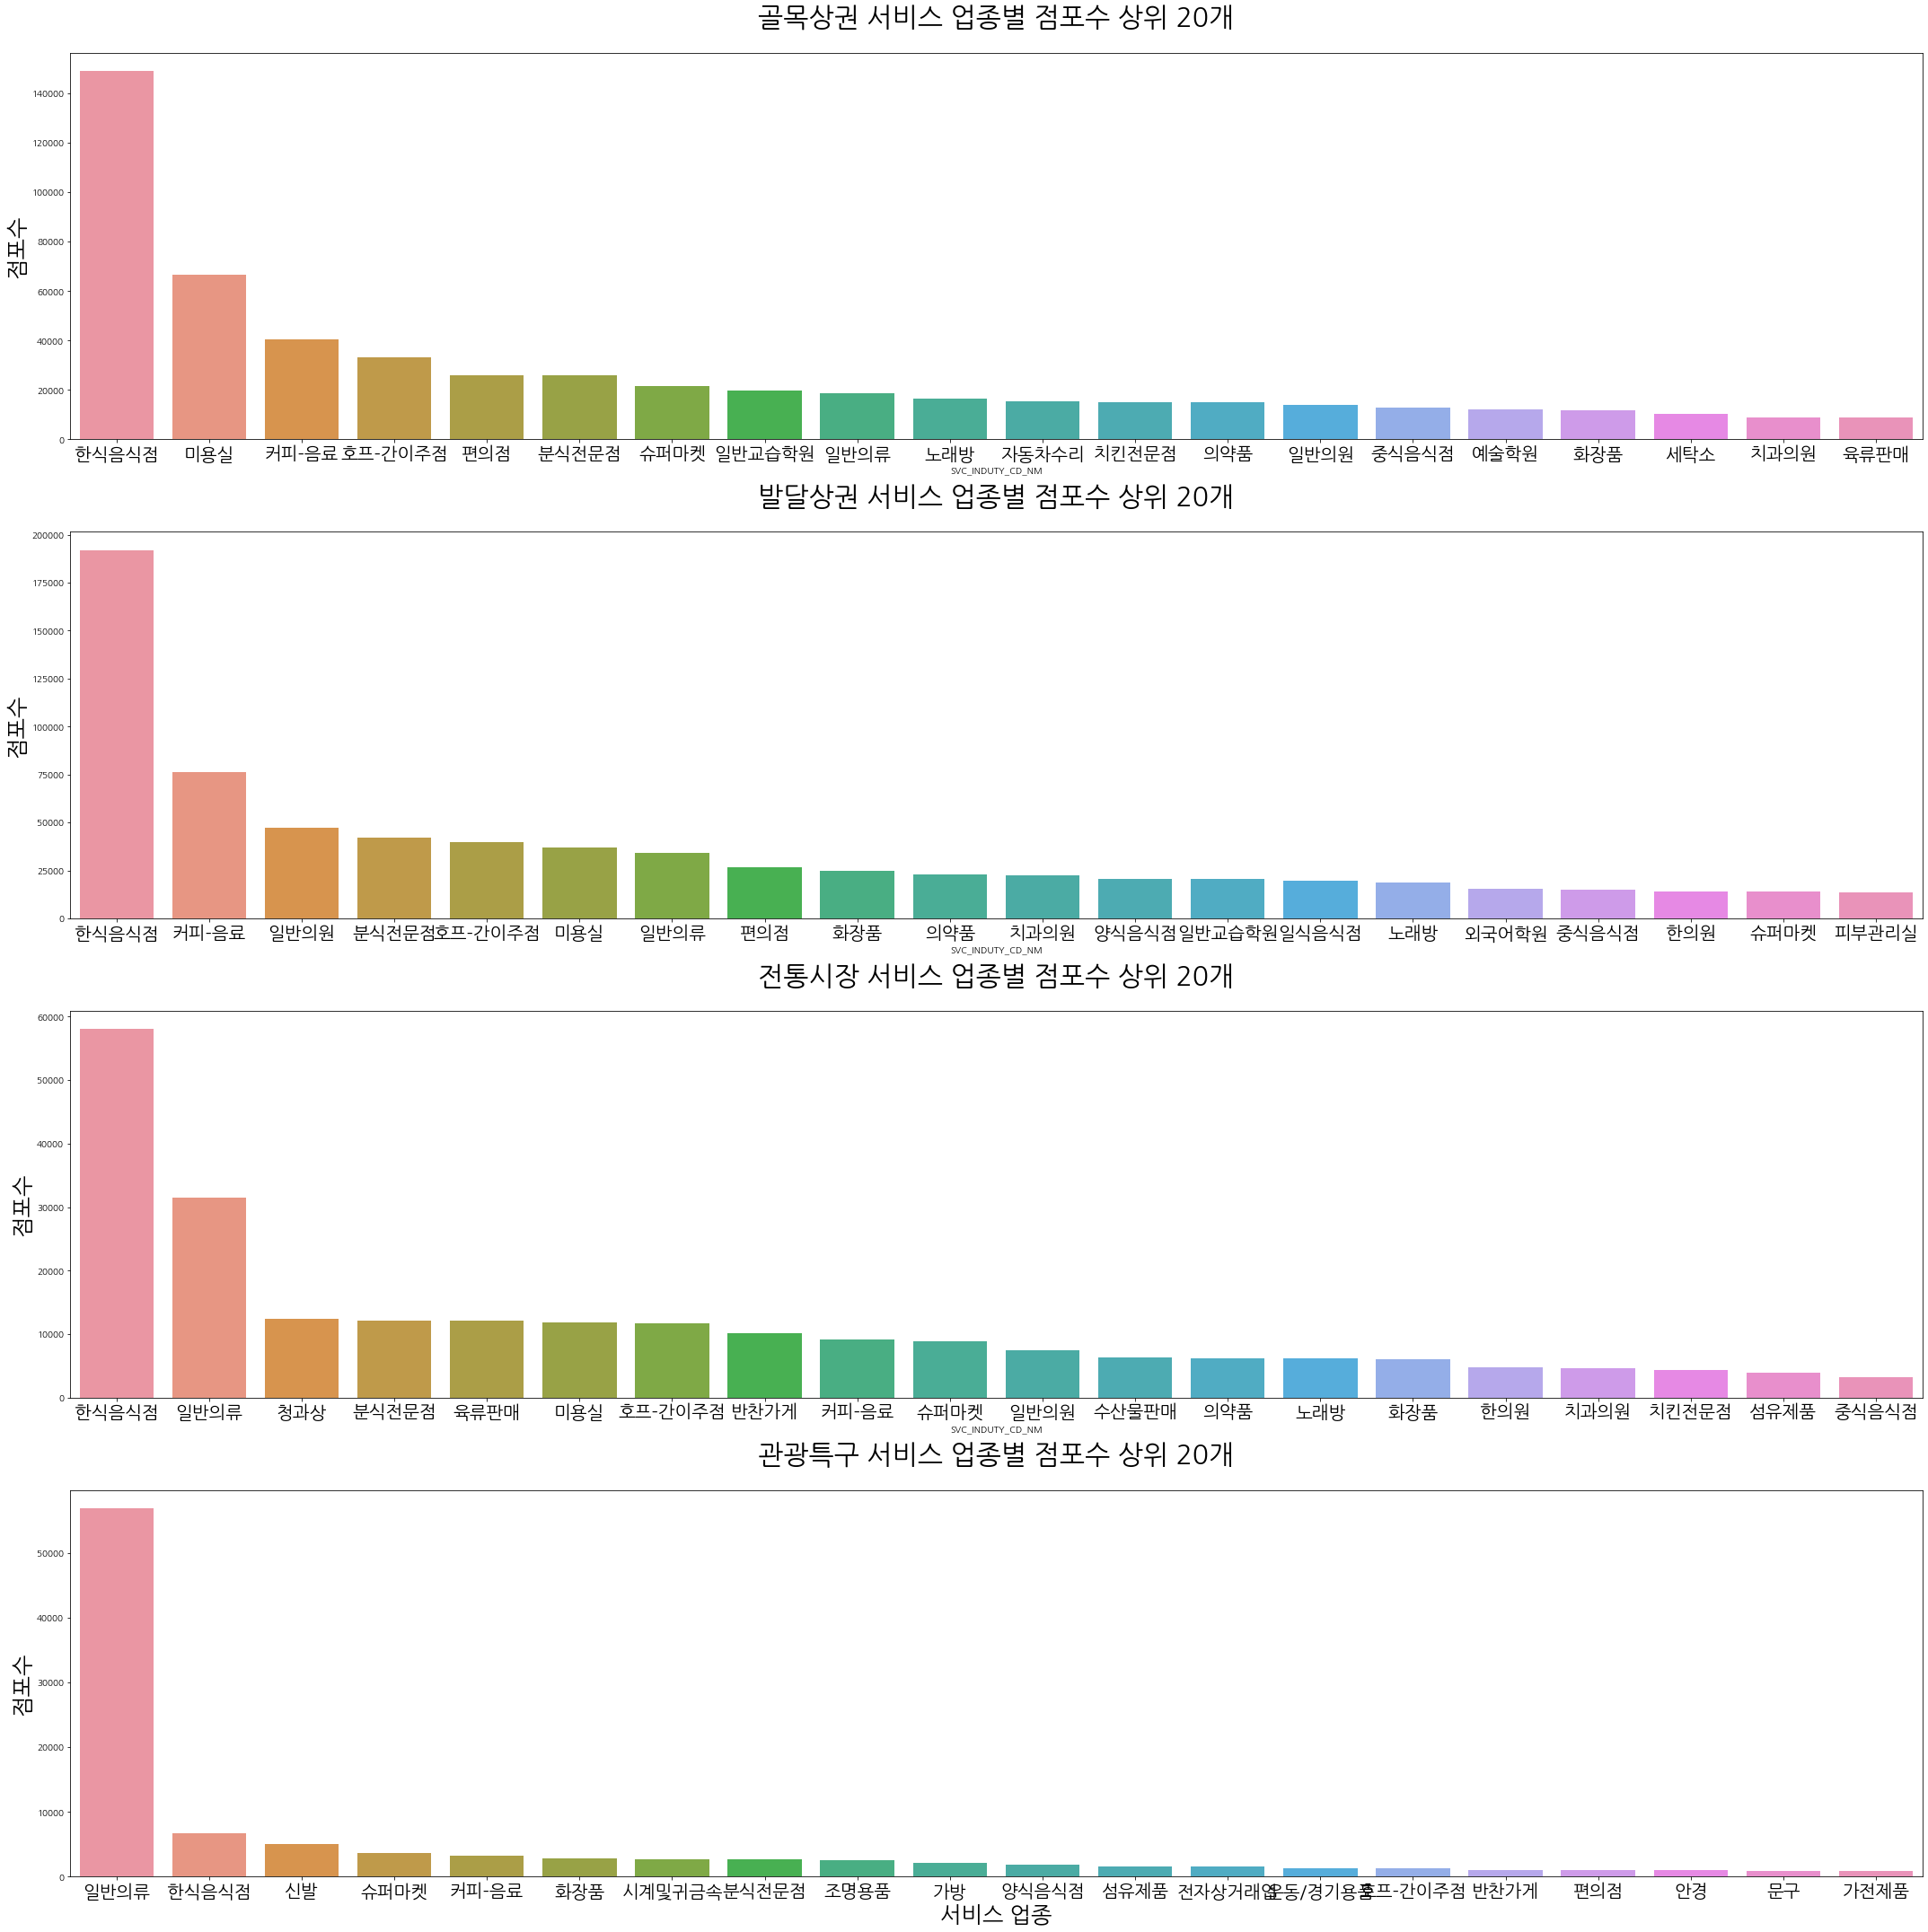

In [34]:
se_list = data['TRDAR_SE_CD_NM'].unique().tolist()

plt.figure(figsize=(30, 30))
for i in range(4):
    plt.subplot(4, 1, i+1)
    df = data[data['TRDAR_SE_CD_NM']== se_list[i]].groupby(['SVC_INDUTY_CD_NM'])['STOR_CO'].sum().to_frame().sort_values(by='STOR_CO', ascending =False).head(20)
    sns.barplot(x=df.index, y='STOR_CO', data=df)
    plt.title("{} 서비스 업종별 점포수 상위 20개".format(se_list[i]), fontsize = 30, pad=30)
    plt.ylabel("점포수", fontsize = 25)
    plt.xticks(fontsize = 20)
plt.xlabel("서비스 업종",fontsize = 25)
plt.tight_layout()
plt.show()

### 분기별 매출차이

In [35]:
# 분기별 매출 차이
pd.crosstab(data['TRDAR_SE_CD_NM'],data['STDR_QU_CD'], data['THSMON_SELNG_AMT'] , aggfunc=sum)

STDR_QU_CD,1,2,3,4
TRDAR_SE_CD_NM,,,,
골목상권,4742504676009,5235447597758,5086102592002,5255628928883
관광특구,1079608158678,1295644857184,1136695378342,1229236171701
발달상권,12458571658982,13430661342705,12811168947625,14534077950374
전통시장,3462068215333,3553210480151,3810643489893,3897226774181


<Figure size 2160x1440 with 0 Axes>

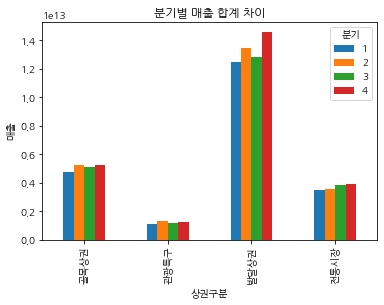

In [36]:
cross_table = pd.crosstab(data['TRDAR_SE_CD_NM'], data['STDR_QU_CD'], values=data['THSMON_SELNG_AMT'], aggfunc=sum)

plt.figure(figsize=(30, 20))
cross_table.plot(kind='bar')
plt.title('분기별 매출 합계 차이')
plt.xlabel('상권구분')
plt.ylabel('매출')
plt.legend(title='분기', loc='upper right')
plt.show()

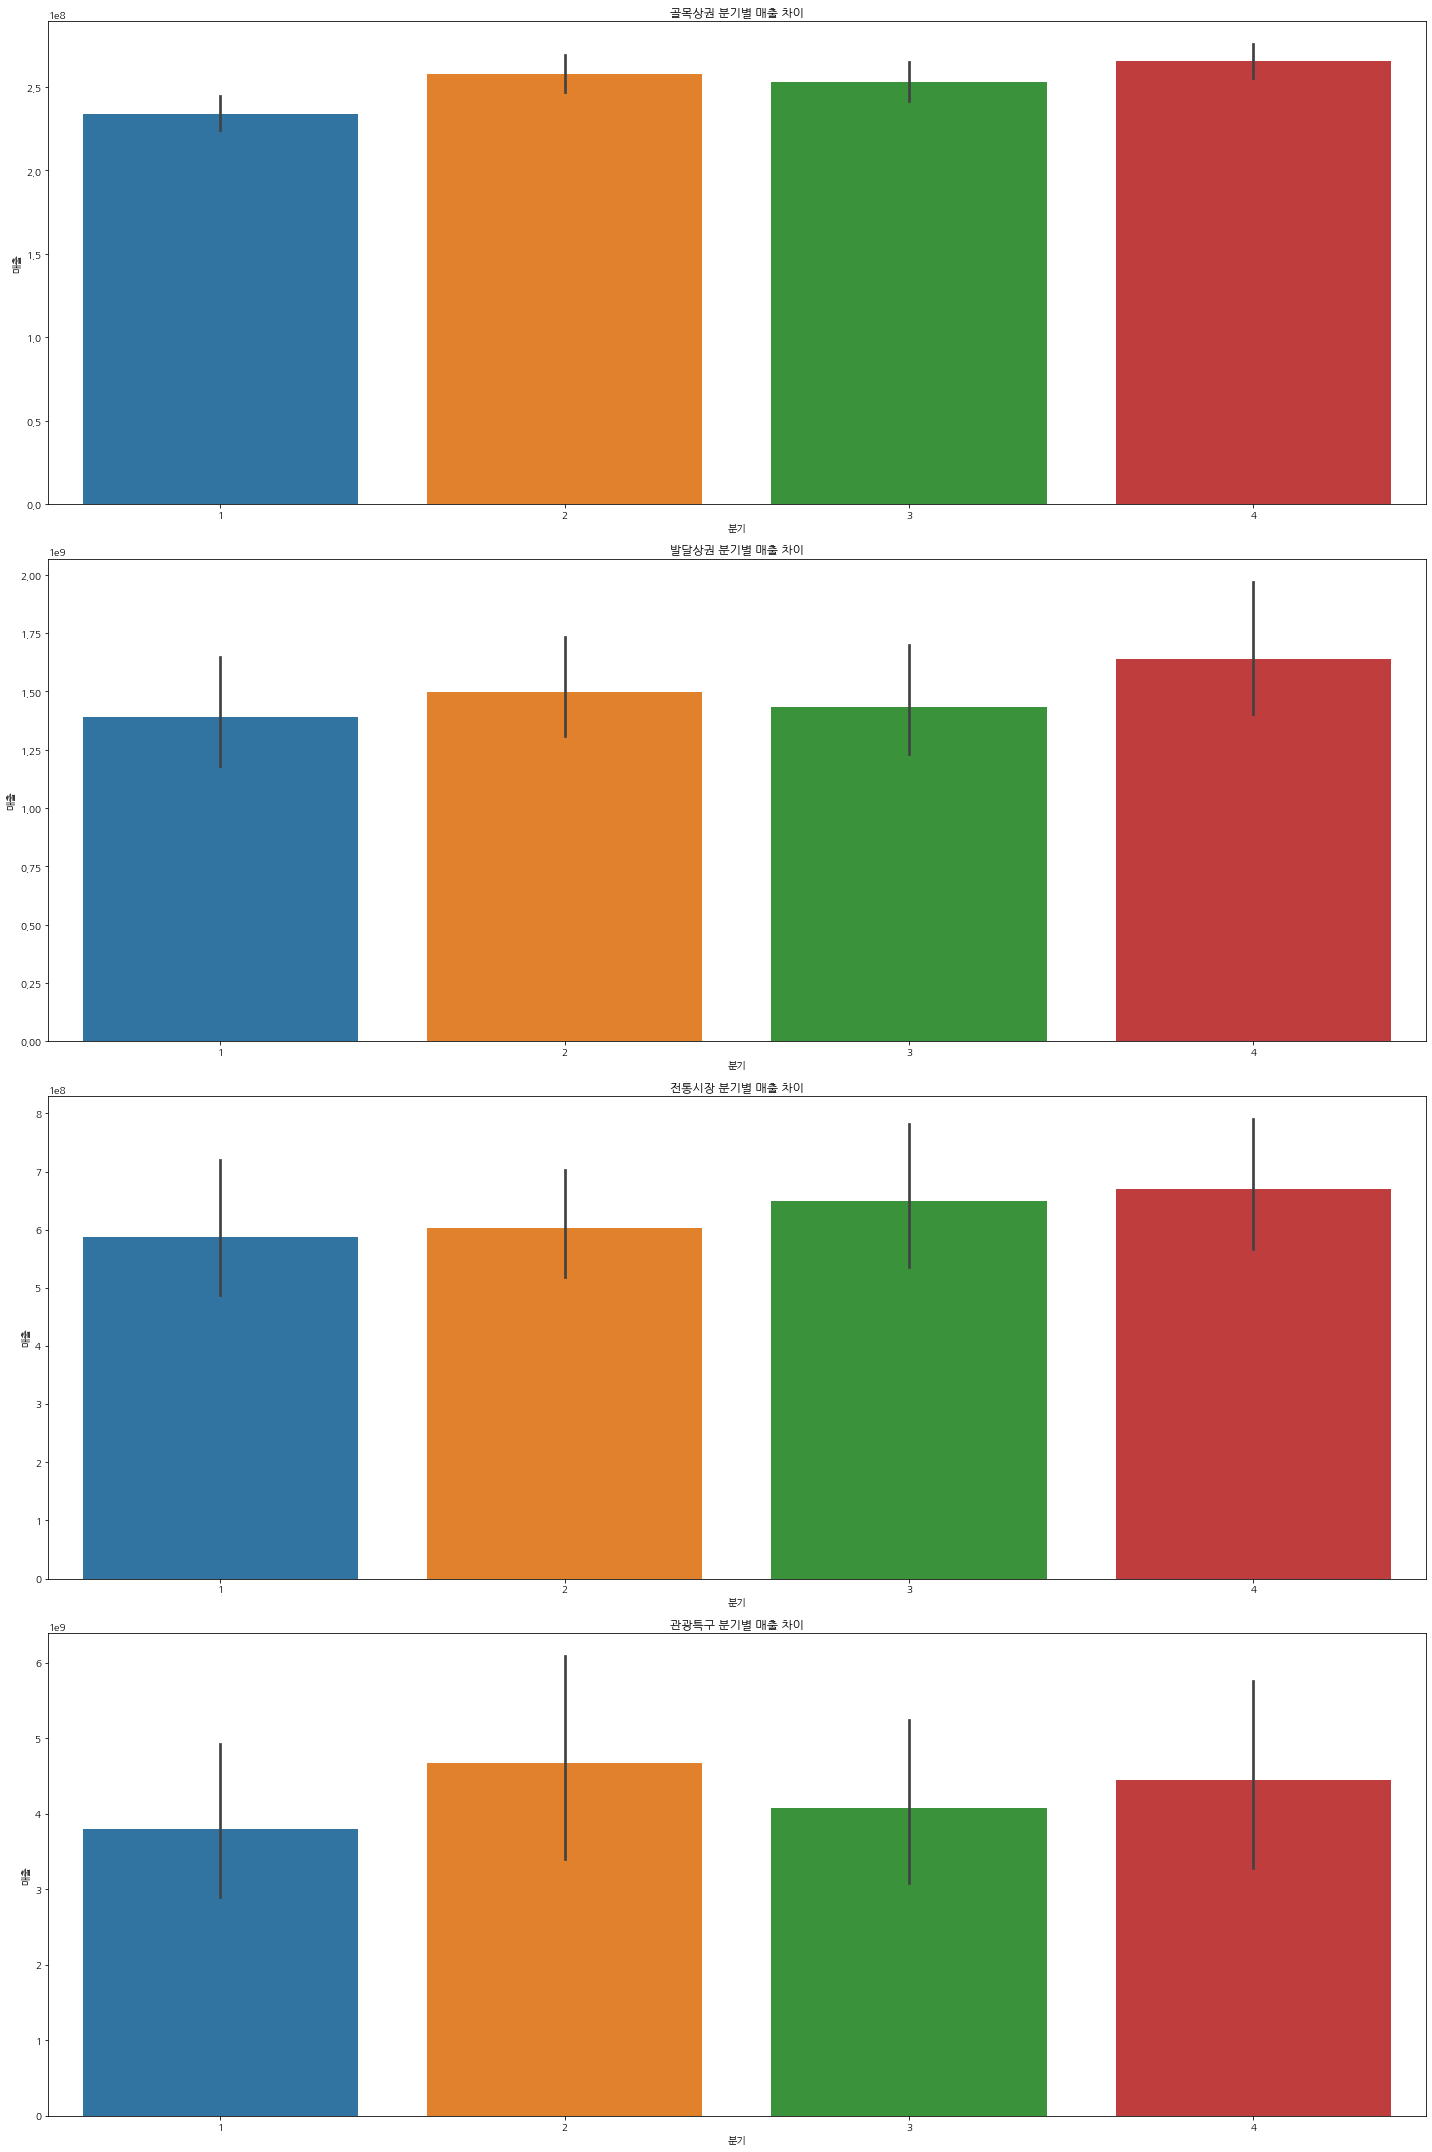

In [37]:
# 분기별 매출 평균 차이
plt.figure(figsize=(20, 30))
for i in range(4):
    plt.subplot(4, 1, i+1)
    sns.barplot(x='STDR_QU_CD', y ='THSMON_SELNG_AMT', data = data[data['TRDAR_SE_CD_NM']== se_list[i]])
    plt.title("{} 분기별 매출 차이".format(se_list[i]))
    plt.xlabel("분기")
    plt.ylabel("매출")
plt.tight_layout()
plt.show()

### 상권구분별 서비스 업종별 평균 매출

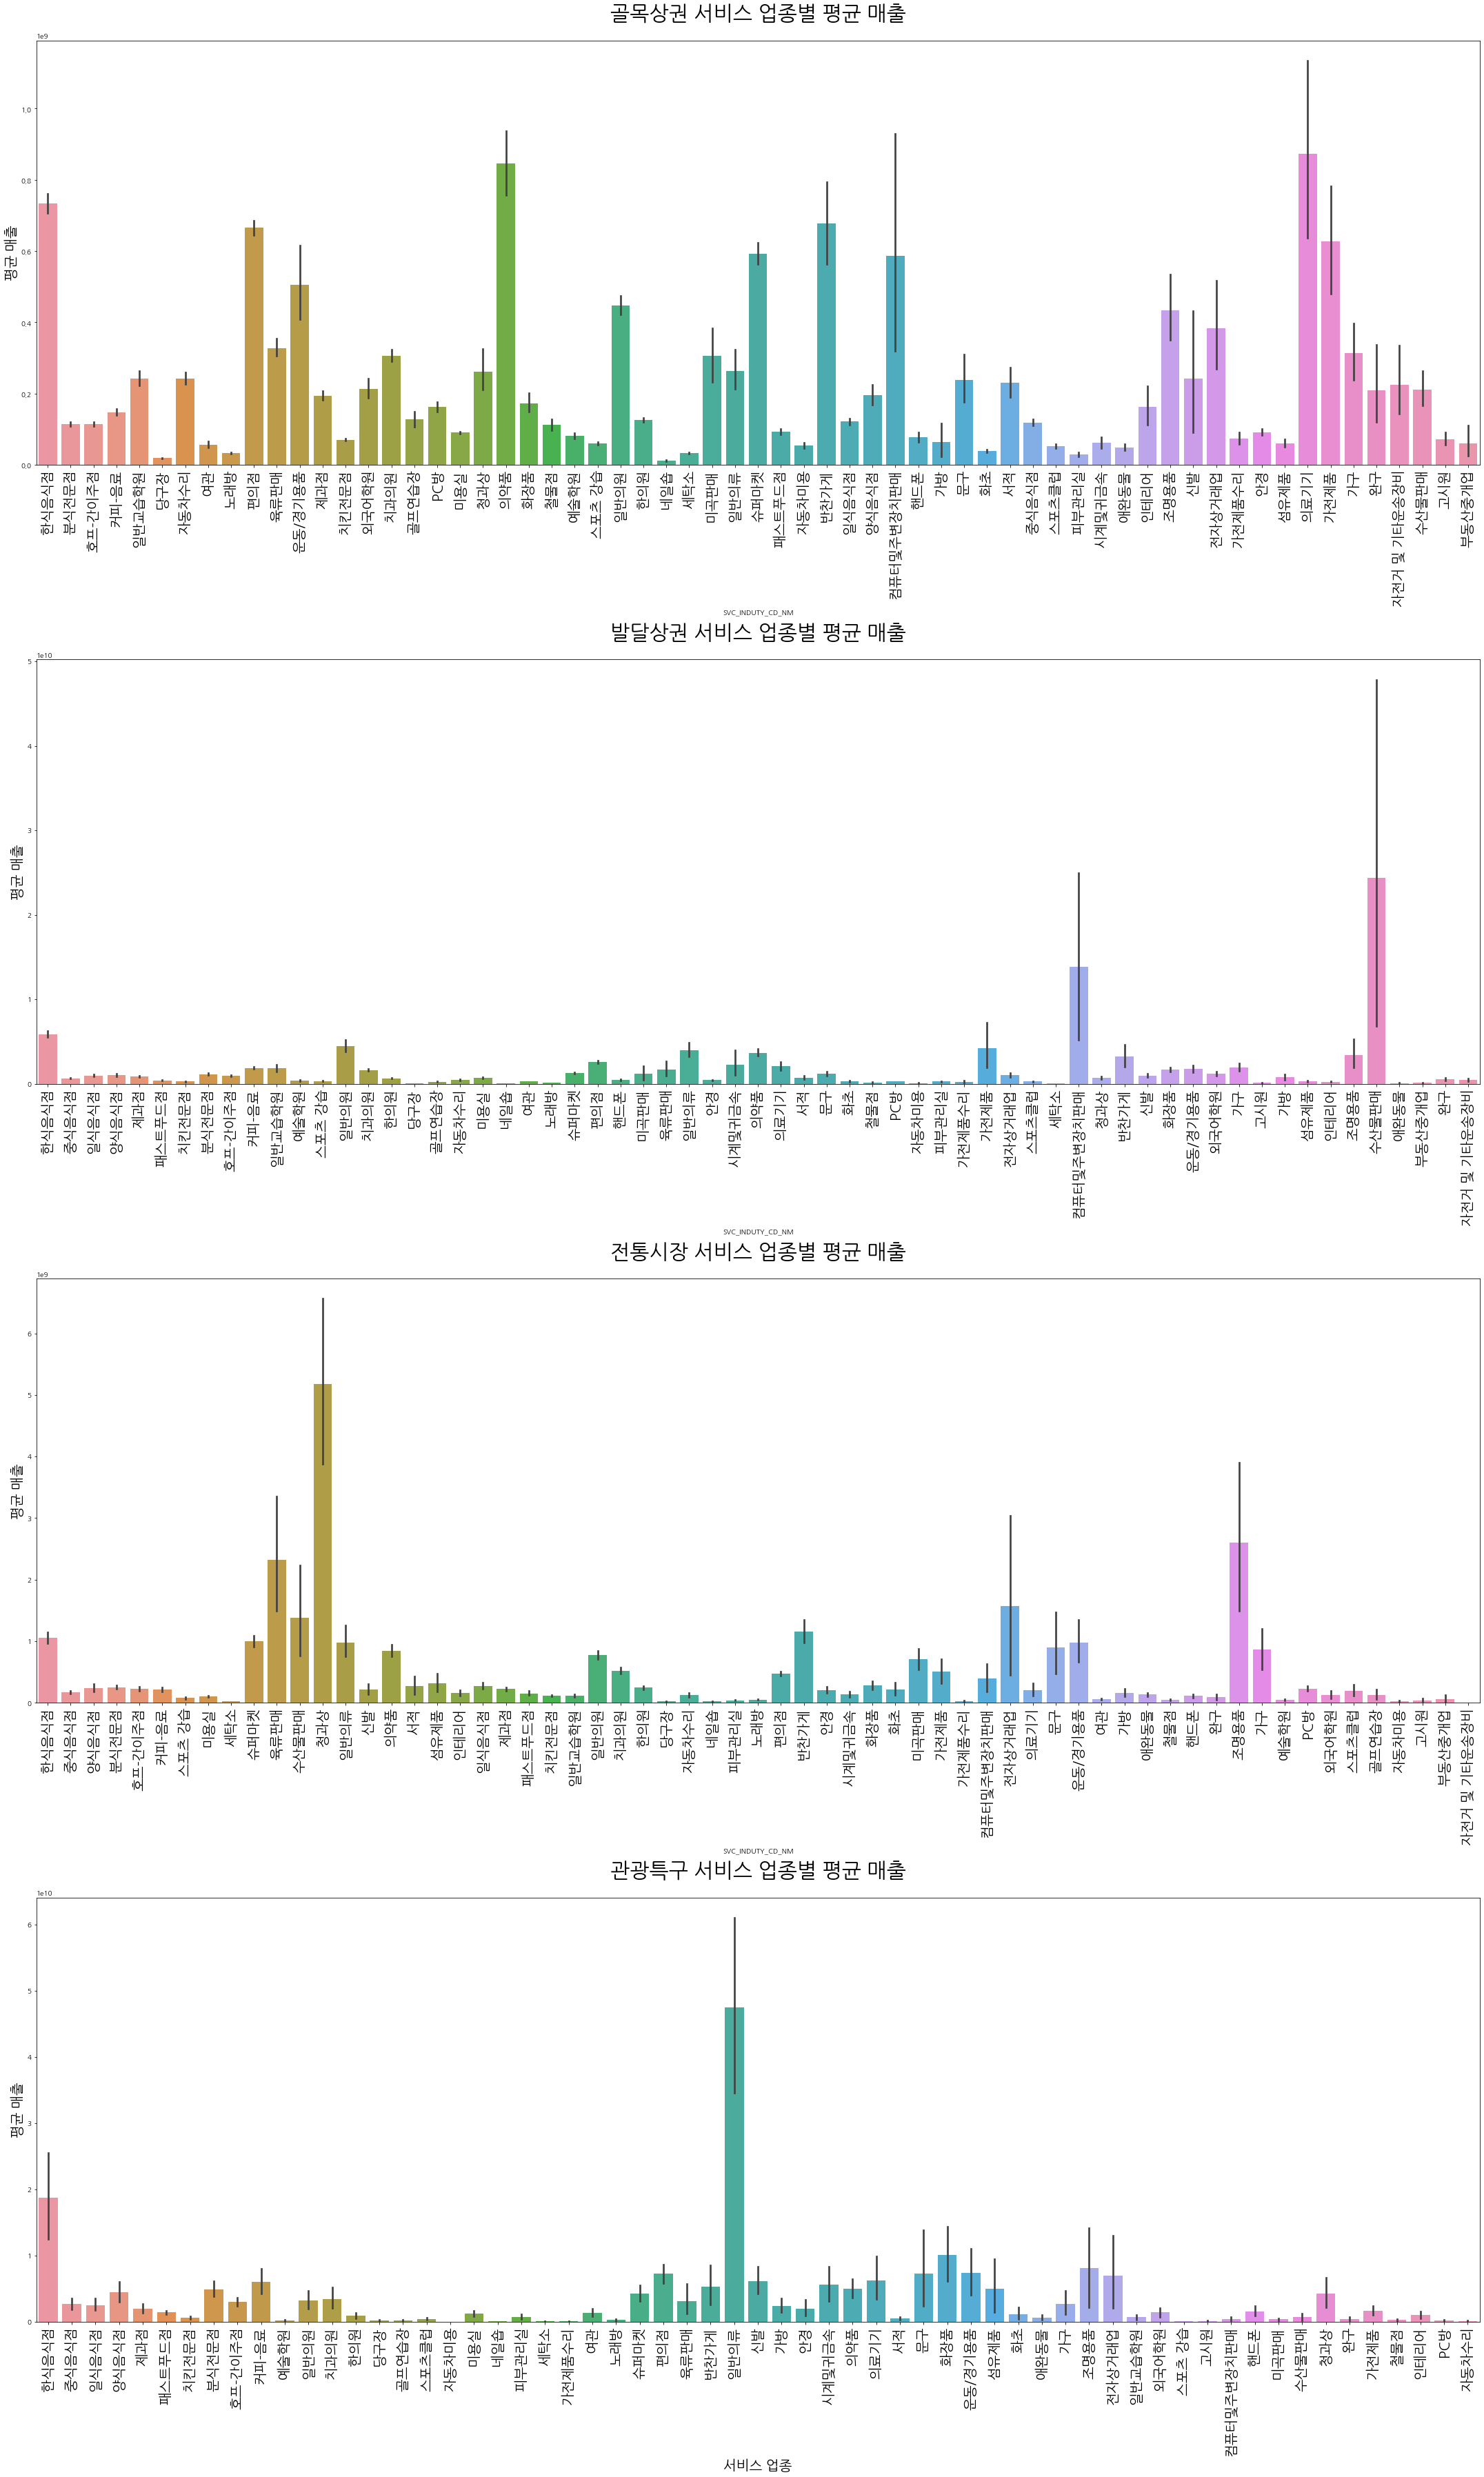

In [38]:
plt.figure(figsize=(30, 50))
for i in range(4):
    plt.subplot(4, 1, i+1)
    df = data[data['TRDAR_SE_CD_NM'] == se_list[i]]
    sns.barplot(x='SVC_INDUTY_CD_NM', y='THSMON_SELNG_AMT', data=df)
    plt.title("{} 서비스 업종별 평균 매출".format(se_list[i]), fontsize=30, pad=30)
    plt.ylabel('평균 매출', fontsize=20)
    plt.xticks(rotation=90, fontsize=20)
plt.xlabel('서비스 업종', fontsize = 20)
plt.tight_layout()
plt.show()

골목상권에서 가장 높은 평균 매출을 기록하는 서비스는 '의료기기'이다.  
두번째는 '의약품'이다.  
세번째는 '한식음식점'이다.  

발달상권에서 가장 높은 평균 매출을 기록한 서비스는 '수산물판매'이다.  
두번째는 '컴퓨터 및 주변장치'이다.

전통시장에서 가장 높은 평균 매출을 기록한 서비스는 '청과상'이다.  
두번째는 '조명용품'이다.  
세번째는 '육류판매'이다.

관광특구에서 가장 높은 평균 매출을 기록한 서비스는 '일반의류'이다.  
두번째는 '한식음식점'이다.  

### 서비스 업종별 건당 평균 매출

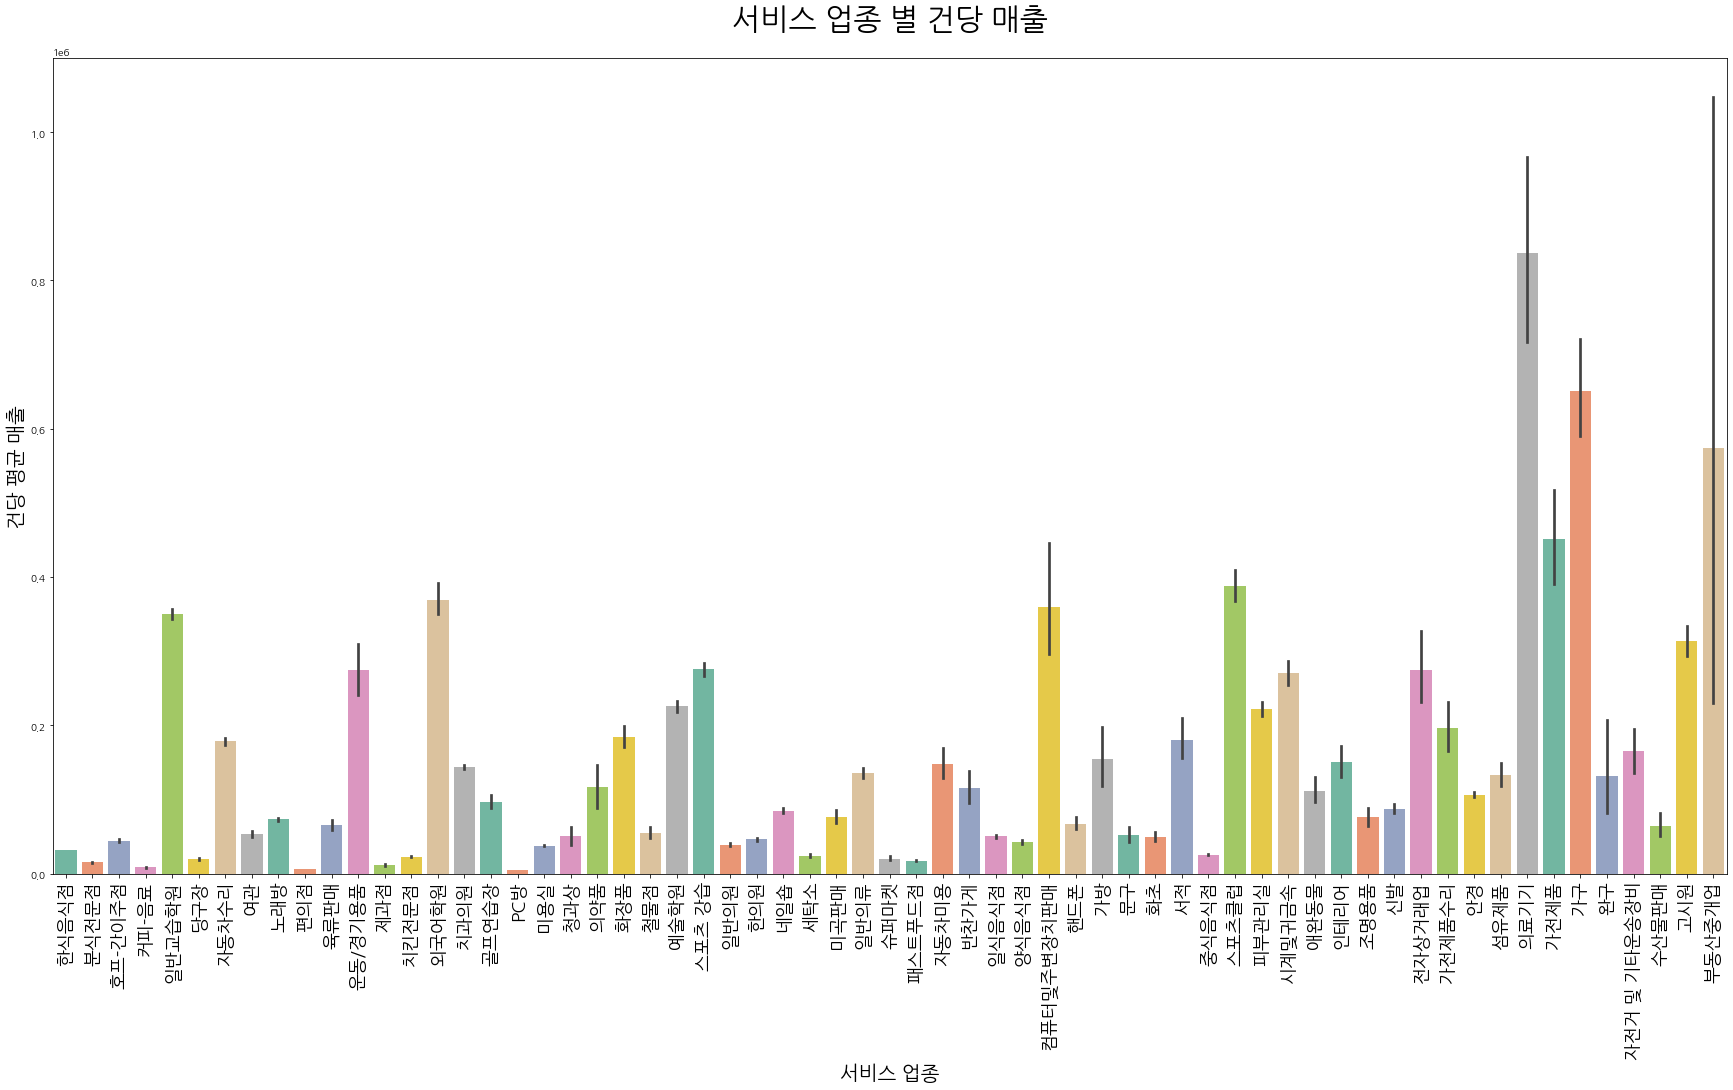

In [39]:
# 건당 평균 매출 컬럼 생성
data['THSMON_AMT_PER_CO_AVG'] = data['THSMON_SELNG_AMT']/data['THSMON_SELNG_CO']

# 서비스 업종별 건당 평균 매출

fig = plt.figure(figsize=(30, 15))
sns.barplot(x='SVC_INDUTY_CD_NM', y ='THSMON_AMT_PER_CO_AVG', data = data, palette='Set2')
plt.title("서비스 업종 별 건당 매출", fontsize = 30, pad=30)
plt.xticks(rotation=90, fontsize = 18)
plt.xlabel("서비스 업종", fontsize = 20)
plt.ylabel("건당 평균 매출", fontsize = 20)
plt.show()

서비스 업종별로 건당 평균 매출이 가장 높은 서비스는 '의료기기'이다.  
두번째는 '가구'이다.  
세번째는 '부동산중개업'이다.

In [40]:
# 연령대별 건당 매출 금액
data['10_AMT_PER_CO_AVG'] = np.where((data['AGRDE_10_SELNG_AMT'] == 0)|(data['AGRDE_10_SELNG_CO'] == 0), 0, data['AGRDE_10_SELNG_AMT'] / data['AGRDE_10_SELNG_CO'])
data['20_AMT_PER_CO_AVG'] = np.where((data['AGRDE_20_SELNG_AMT'] == 0)|(data['AGRDE_20_SELNG_CO'] == 0), 0, data['AGRDE_20_SELNG_AMT'] / data['AGRDE_20_SELNG_CO'])
data['30_AMT_PER_CO_AVG'] = np.where((data['AGRDE_30_SELNG_AMT'] == 0)|(data['AGRDE_30_SELNG_CO'] == 0), 0, data['AGRDE_30_SELNG_AMT'] / data['AGRDE_30_SELNG_CO'])
data['40_AMT_PER_CO_AVG'] = np.where((data['AGRDE_40_SELNG_AMT'] == 0)|(data['AGRDE_40_SELNG_CO'] == 0), 0, data['AGRDE_40_SELNG_AMT'] / data['AGRDE_40_SELNG_CO'])
data['50_AMT_PER_CO_AVG'] = np.where((data['AGRDE_50_SELNG_AMT'] == 0)|(data['AGRDE_50_SELNG_CO'] == 0), 0, data['AGRDE_50_SELNG_AMT'] / data['AGRDE_50_SELNG_CO'])
data['60_AMT_PER_CO_AVG'] = np.where((data['AGRDE_60_ABOVE_SELNG_AMT'] == 0)|(data['AGRDE_60_ABOVE_SELNG_CO'] == 0), 0, data['AGRDE_60_ABOVE_SELNG_AMT'] / data['AGRDE_60_ABOVE_SELNG_CO'])

# plt.figure(figsize=(30, 60))
# for i in range(6):
#     plt.subplot(6, 1, i+1)
#     df = data[data['TRDAR_SE_CD_NM'] == se_list[i]]
#     sns.barplot(x='SVC_INDUTY_CD_NM', y='THSMON_SELNG_AMT', data=df)
#     plt.title("{} 서비스 업종별 평균 매출".format(se_list[i]), fontsize=30)
#     plt.ylabel('평균 매출', fontsize=20)
#     plt.xticks(rotation=90, fontsize=20)
# plt.xlabel('서비스 업종', fontsize = 20)
# plt.tight_layout()
# plt.show()

In [41]:
data[data['AGRDE_10_SELNG_AMT'] == 0]['AGRDE_10_SELNG_CO'].value_counts()

0      69788
12         3
16         3
26         3
9          2
10         2
14         2
25         2
8          1
13         1
269        1
15         1
28         1
29         1
30         1
33         1
Name: AGRDE_10_SELNG_CO, dtype: int64

In [42]:
data['10_AMT_PER_CO_AVG'].describe()

count    1.408300e+05
mean     1.087942e+04
std      4.545172e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.561940e+03
75%      1.001376e+04
max      6.062798e+06
Name: 10_AMT_PER_CO_AVG, dtype: float64

In [43]:
data['20_AMT_PER_CO_AVG']

0          16805.518215
1           5033.556156
2              0.000000
3           8371.288066
4              0.000000
              ...      
140825     24596.357097
140826    204666.391304
140827    161531.926667
140828         0.000000
140829     15255.444444
Name: 20_AMT_PER_CO_AVG, Length: 140830, dtype: float64

In [44]:
data['AGRDE_10_SELNG_CO']

0         108
1          52
2           0
3           0
4           0
         ... 
140825    105
140826      0
140827    144
140828      0
140829      0
Name: AGRDE_10_SELNG_CO, Length: 140830, dtype: int64

### 서비스별 성별 비율

In [45]:
data.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE','FML_SELNG_RATE']].sort_values(by = 'ML_SELNG_RATE', ascending =False)

,ML_SELNG_RATE,FML_SELNG_RATE
SVC_INDUTY_CD_NM,,
당구장,88.810000,11.282500
PC방,83.793186,16.303048
노래방,82.552827,17.538264
여관,76.597694,23.493325
골프연습장,75.607198,24.487749
...,...,...
섬유제품,33.626308,66.461136
화장품,31.731464,68.357511
일반의류,28.597232,71.484133


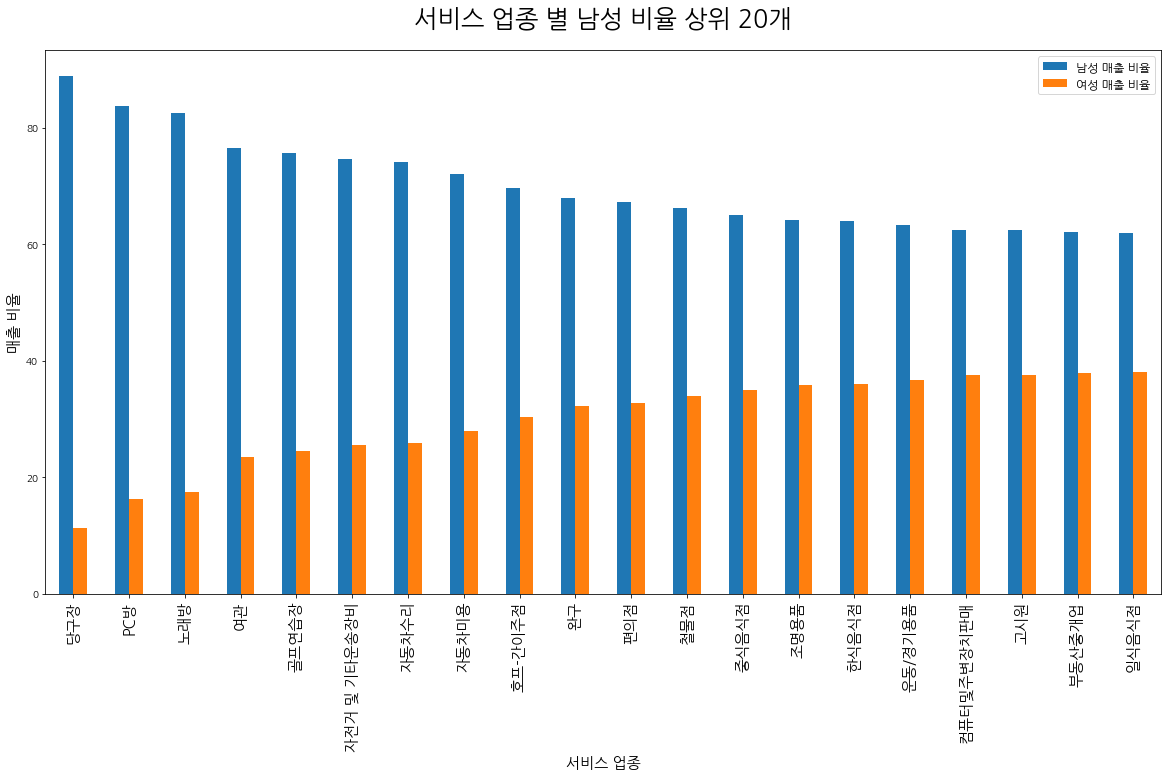

In [46]:
top_20_industries = data.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE', 'FML_SELNG_RATE']].sort_values(by='ML_SELNG_RATE', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(20, 10))
top_20_industries.plot(kind='bar', ax=ax)
ax.set_title('서비스 업종 별 남성 비율 상위 20개', fontsize=25, pad =25)
ax.set_xlabel("서비스 업종", fontsize=15)
ax.set_ylabel("매출 비율", fontsize=15)
ax.legend(["남성 매출 비율", "여성 매출 비율"], fontsize=12)
ax.set_xticklabels(top_20_industries.index, rotation=90, fontsize=15)
plt.show()

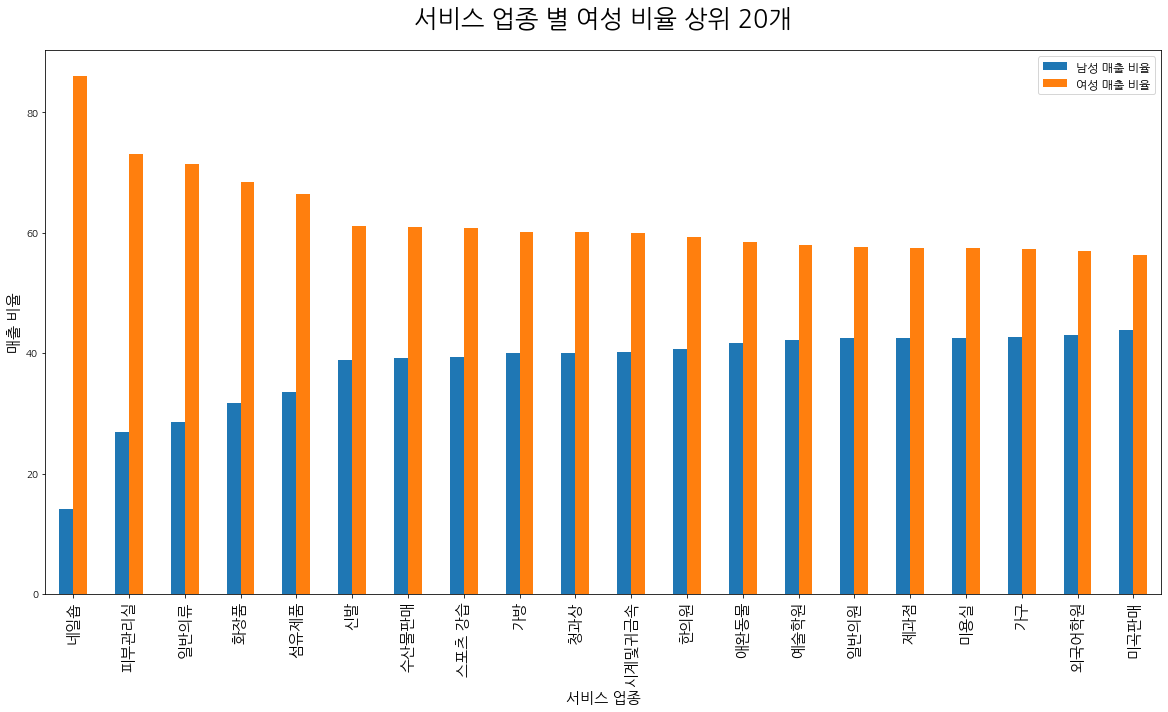

In [47]:
top_20_industries = data.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE', 'FML_SELNG_RATE']].sort_values(by='FML_SELNG_RATE', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(20, 10))
top_20_industries.plot(kind='bar', ax=ax)
ax.set_title('서비스 업종 별 여성 비율 상위 20개', fontsize=25, pad =25)
ax.set_xlabel("서비스 업종", fontsize=15)
ax.set_ylabel("매출 비율", fontsize=15)
ax.legend(["남성 매출 비율", "여성 매출 비율"], fontsize=12)
ax.set_xticklabels(top_20_industries.index, rotation=90, fontsize=15)
plt.show()

### 서비스 업종별 연령대 비율 

In [48]:
data.groupby(['SVC_INDUTY_CD_NM']).mean()[['AGRDE_10_SELNG_RATE', 'AGRDE_20_SELNG_RATE','AGRDE_30_SELNG_RATE','AGRDE_40_SELNG_RATE','AGRDE_50_SELNG_RATE', 'AGRDE_60_ABOVE_SELNG_RATE']].head(20)

,AGRDE_10_SELNG_RATE,AGRDE_20_SELNG_RATE,AGRDE_30_SELNG_RATE,AGRDE_40_SELNG_RATE,AGRDE_50_SELNG_RATE,AGRDE_60_ABOVE_SELNG_RATE
SVC_INDUTY_CD_NM,,,,,,
PC방,7.985655,56.937238,21.451285,6.946802,5.377167,1.527197
가구,0.034059,4.778619,12.666982,18.100284,30.979186,33.612110
가방,0.659091,12.066116,15.359504,14.923554,27.250000,29.944215
가전제품,0.183056,5.821483,14.299546,17.880484,29.175492,32.798790
가전제품수리,0.083470,6.176759,14.986907,21.021277,27.037643,30.844517
고시원,0.416949,15.081356,20.616949,24.867797,21.023729,18.040678
골프연습장,0.037519,5.475498,20.754977,30.683002,31.424196,11.861409
네일숍,0.538708,16.439539,26.738324,25.729367,19.644914,11.082534
노래방,1.285551,12.635351,16.115077,22.910051,31.446031,15.829812


In [49]:
# 상권업종대분류 컬럼 생성
data['SVC_INDUTY_BIGCD_NM'] = data['SVC_INDUTY_CD_NM'].apply(lambda x: '소매' if x in ['애완동물','자전거 및 기타운송장비','조명용품','완구','육류판매','가전제품', '서적', '철물점','화장품','제과점', 
                                                                                 '전자상거래업', '청과상', '핸드폰', '컴퓨터및주변장치판매', '반찬가게','가방', '가구', '슈퍼마켓', '화초', '인테리어', 
                                                                                 '수산물판매','미곡판매', '일반의류', '문구', '편의점', '의료기기', '신발', '안경','시계및귀금속']
                                             else '음식점' if x in ['일식음식점', '패스트푸드점', '한식음식점', '중식음식점', '분식전문점', '커피-음료', '양식음식점', '치킨전문점']
                                             else '여가/오락' if x in ['당구장', '네일숍','피부관리실' ,'PC방','노래방', '여관','자동차미용'] 
                                             else '스포츠'if x in['스포츠클럽','운동/경기용품', '스포츠 강습' ,'골프연습장']
                                             else '의원' if x in ['일반의원', '치과의원' , '한의원']
                                             else '생활서비스'if x in['부동산중개업', '미용실','세탁소','자동차수리']
                                             else '학원/교육')

# 결과 출력
data['SVC_INDUTY_BIGCD_NM'].unique()

array(['음식점', '학원/교육', '여가/오락', '생활서비스', '소매', '스포츠', '의원'], dtype=object)

In [50]:
svc_age_rate = data.groupby('SVC_INDUTY_BIGCD_NM').mean()[['AGRDE_10_SELNG_RATE', 'AGRDE_20_SELNG_RATE', 'AGRDE_30_SELNG_RATE', 'AGRDE_40_SELNG_RATE', 'AGRDE_50_SELNG_RATE', 'AGRDE_60_ABOVE_SELNG_RATE']]
svc_age_rate

,AGRDE_10_SELNG_RATE,AGRDE_20_SELNG_RATE,AGRDE_30_SELNG_RATE,AGRDE_40_SELNG_RATE,AGRDE_50_SELNG_RATE,AGRDE_60_ABOVE_SELNG_RATE
SVC_INDUTY_BIGCD_NM,,,,,,
생활서비스,0.482507,11.524081,19.689753,24.103356,25.907950,18.531826
소매,0.675109,11.406012,17.026021,21.086799,25.141150,24.873727
스포츠,0.474549,14.532998,23.490678,31.446878,20.741935,9.488754
여가/오락,2.004606,19.565566,19.185847,20.669481,24.959313,13.824831
음식점,1.180146,19.670883,22.610344,23.158816,21.419806,12.217953
의원,0.160759,7.108333,14.296624,21.213713,26.306435,31.124684
학원/교육,0.367514,8.716563,14.975192,36.235449,22.737722,17.140315


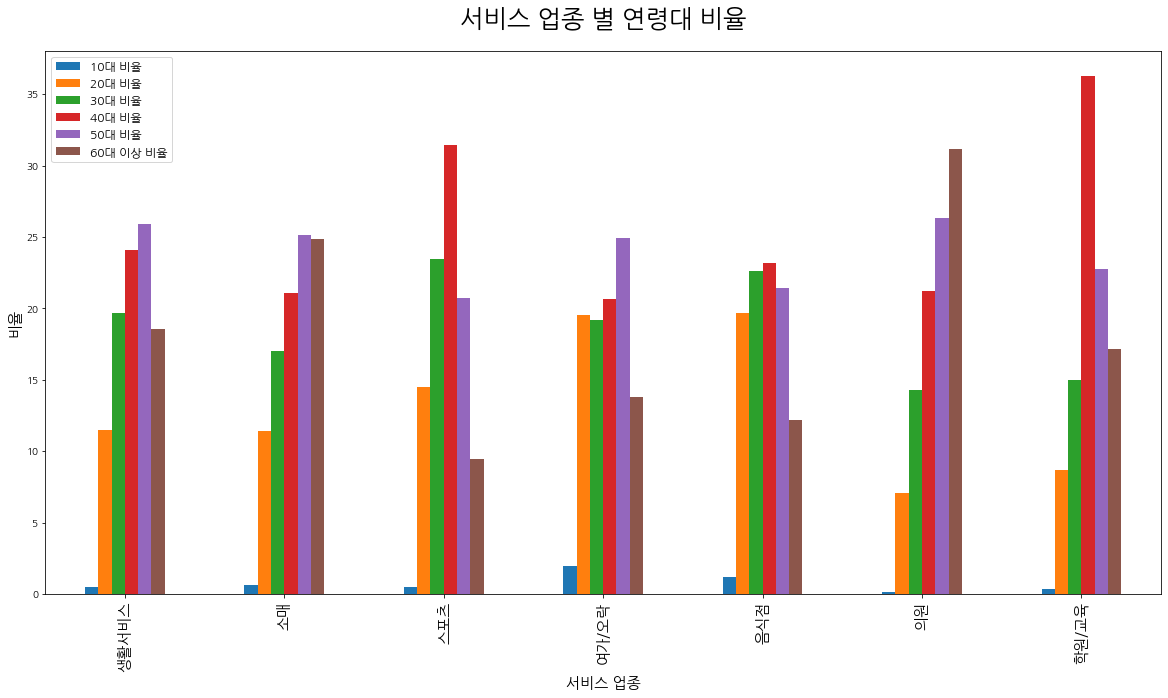

In [51]:
fig, ax = plt.subplots(figsize=(20, 10))
svc_age_rate.plot(kind='bar', ax=ax)
ax.set_title('서비스 업종 별 연령대 비율', fontsize=25, pad =25)
ax.set_xlabel("서비스 업종", fontsize=15)
ax.set_ylabel("비율", fontsize=15)
ax.legend(["10대 비율", "20대 비율","30대 비율","40대 비율","50대 비율","60대 이상 비율"], fontsize=12)
ax.set_xticklabels(svc_age_rate.index,fontsize=15)
plt.show()

### 서비스 업종별 상관관계

In [52]:
data[['TRDAR_CD_NM','SVC_INDUTY_CD_NM', 'THSMON_SELNG_AMT']]

,TRDAR_CD_NM,SVC_INDUTY_CD_NM,THSMON_SELNG_AMT
0,이북5도청사,한식음식점,626851391
1,이북5도청사,분식전문점,122957138
2,이북5도청사,호프-간이주점,5093349
3,이북5도청사,커피-음료,13507733
4,이북5도청사,일반교습학원,37551380
...,...,...,...
140825,강남 마이스 관광특구,화초,997157377
140826,강남 마이스 관광특구,가구,11911789492
140827,강남 마이스 관광특구,가전제품,1717076948
140828,강남 마이스 관광특구,인테리어,12566919


In [53]:
data[data['SVC_INDUTY_CD_NM'] == '편의점'][['TRDAR_CD_NM','STDR_QU_CD' ,'THSMON_SELNG_AMT']]

,TRDAR_CD_NM,STDR_QU_CD,THSMON_SELNG_AMT
9,이북5도청사,1,304683359
24,독립문역 1번,1,1631546010
45,세검정초등학교,1,375813401
71,세검정,1,524001086
79,부암동주민센터,1,126276257
...,...,...,...
140625,명동 남대문 북창동 다동 무교동 관광특구,4,12075768180
140676,동대문패션타운 관광특구,4,7810291833
140726,종로·청계 관광특구,4,5018884428
140778,잠실 관광특구,4,9131540997


In [54]:
data[data['SVC_INDUTY_CD_NM'] == '일반교습학원'][['TRDAR_CD_NM','STDR_QU_CD' ,'THSMON_SELNG_AMT']]

,TRDAR_CD_NM,STDR_QU_CD,THSMON_SELNG_AMT
4,이북5도청사,1,37551380
16,독립문역 1번,1,143017534
34,세검정초등학교,1,28386927
51,대신고등학교,1,237138494
62,세검정,1,439886615
...,...,...,...
140462,둔촌역전통시장,4,206316533
140490,길동복조리시장,4,2995837
140517,명일전통시장,4,109681529
140608,명동 남대문 북창동 다동 무교동 관광특구,4,1176000000


In [55]:
conv = data[data['SVC_INDUTY_CD_NM'] == '편의점'].groupby('TRDAR_CD_NM')['THSMON_SELNG_AMT'].sum().to_frame()
conv

,THSMON_SELNG_AMT
TRDAR_CD_NM,
4.19민주묘지역 2번,1236120276
63빌딩,3038005854
DMC(디지털미디어시티),19525345346
GS강동자이아파트,1904607350
G타워,5518633002
...,...
효창공원앞역 6번,1889242399
후암동주민센터,4202654182
후암시장,517728722


In [56]:
acad = data[data['SVC_INDUTY_CD_NM'] == '일반교습학원'].groupby('TRDAR_CD_NM')['THSMON_SELNG_AMT'].sum().to_frame()
acad

,THSMON_SELNG_AMT
TRDAR_CD_NM,
DMC(디지털미디어시티),5784000000
GS강동자이아파트,105982026
KB국민은행 서강지점,247465836
KT금천빌딩(금천구시설관리공단),286904349
KT대방빌딩,2464229
...,...
효창공원앞역 6번,6196169
후암동주민센터,97974213
후암시장,241828447


In [57]:
merged_data = conv.merge(acad, on='TRDAR_CD_NM', suffixes=('_conv', '_acad'), how='inner')
merged_data

,THSMON_SELNG_AMT_conv,THSMON_SELNG_AMT_acad
TRDAR_CD_NM,,
DMC(디지털미디어시티),19525345346,5784000000
GS강동자이아파트,1904607350,105982026
KB국민은행 서강지점,3073054882,247465836
NH농협은행 보광동지점,4379016358,78571686
NH농협은행 상도동지점,3442050836,53855792
...,...,...
효창공원앞역 6번,1889242399,6196169
후암동주민센터,4202654182,97974213
후암시장,517728722,241828447


In [58]:
merged_data.corr()

,THSMON_SELNG_AMT_conv,THSMON_SELNG_AMT_acad
THSMON_SELNG_AMT_conv,1.000000,0.156247
THSMON_SELNG_AMT_acad,0.156247,1.000000


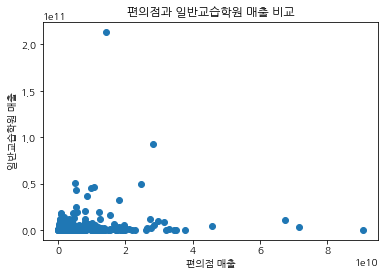

In [59]:
plt.scatter(x=merged_data['THSMON_SELNG_AMT_conv'], y=merged_data['THSMON_SELNG_AMT_acad'])
plt.xlabel('편의점 매출')
plt.ylabel('일반교습학원 매출')
plt.title('편의점과 일반교습학원 매출 비교')
plt.show()

In [60]:
# 서비스간 상관관계가 0.6이상인 경우만 출력
svc = data['SVC_INDUTY_CD_NM'].unique().tolist()

for i in range(len(svc)-1):
    a = data[data['SVC_INDUTY_CD_NM'] == svc[i]].groupby('TRDAR_CD_NM')['THSMON_SELNG_AMT'].sum().to_frame()
    b = data[data['SVC_INDUTY_CD_NM'] == svc[i+1]].groupby('TRDAR_CD_NM')['THSMON_SELNG_AMT'].sum().to_frame()
    merged_data = a.merge(b, on='TRDAR_CD_NM', suffixes=(svc[i], svc[i+1]), how='inner')
    correlation = merged_data.corr() 
    high_corr = correlation[((correlation < -0.6)|(correlation > 0.6)) & (correlation < 1.0) ]
    print(high_corr)

                       THSMON_SELNG_AMT한식음식점  THSMON_SELNG_AMT분식전문점
THSMON_SELNG_AMT한식음식점                    NaN                0.79802
THSMON_SELNG_AMT분식전문점                0.79802                    NaN
                         THSMON_SELNG_AMT분식전문점  THSMON_SELNG_AMT호프-간이주점
THSMON_SELNG_AMT분식전문점                      NaN                 0.644298
THSMON_SELNG_AMT호프-간이주점               0.644298                      NaN
                         THSMON_SELNG_AMT호프-간이주점  THSMON_SELNG_AMT커피-음료
THSMON_SELNG_AMT호프-간이주점                      NaN                0.68138
THSMON_SELNG_AMT커피-음료                    0.68138                    NaN
                        THSMON_SELNG_AMT커피-음료  THSMON_SELNG_AMT일반교습학원
THSMON_SELNG_AMT커피-음료                     NaN                     NaN
THSMON_SELNG_AMT일반교습학원                    NaN                     NaN
                        THSMON_SELNG_AMT일반교습학원  THSMON_SELNG_AMT당구장
THSMON_SELNG_AMT일반교습학원                     NaN                  NaN
THSMON_SELNG_AMT당구

                       THSMON_SELNG_AMT스포츠클럽  THSMON_SELNG_AMT피부관리실
THSMON_SELNG_AMT스포츠클럽                    NaN                    NaN
THSMON_SELNG_AMT피부관리실                    NaN                    NaN
                        THSMON_SELNG_AMT피부관리실  THSMON_SELNG_AMT시계및귀금속
THSMON_SELNG_AMT피부관리실                     NaN                     NaN
THSMON_SELNG_AMT시계및귀금속                    NaN                     NaN
                        THSMON_SELNG_AMT시계및귀금속  THSMON_SELNG_AMT애완동물
THSMON_SELNG_AMT시계및귀금속                     NaN                   NaN
THSMON_SELNG_AMT애완동물                       NaN                   NaN
                      THSMON_SELNG_AMT애완동물  THSMON_SELNG_AMT인테리어
THSMON_SELNG_AMT애완동물                   NaN                   NaN
THSMON_SELNG_AMT인테리어                   NaN                   NaN
                      THSMON_SELNG_AMT인테리어  THSMON_SELNG_AMT조명용품
THSMON_SELNG_AMT인테리어                   NaN                   NaN
THSMON_SELNG_AMT조명용품                   NaN            

서비스 업종끼리의 매출 상관관계를 보았을 때,  
한식음식점과 분식음식점의 상관관계가 0.79802,  
분식전문점과 호프-간이주점의 상관관계가 0.644298,  
호프-간이주점과 커피-음료의 상관관계가 0.68138,  
한의원과 네일숍의 상관관계가 0.642415,  
자전거 및 기타운송장비과 수산물판매의 상관관계가 -0.632795이다.

### 상권 생활인구 데이터에서 상권_코드_명과 상권 매출 데이터에서 상권_코드_명이 일치하는 지 확인

In [61]:
pop['상권_코드_명'].unique().tolist()

['강남 마이스 관광특구',
 '잠실 관광특구',
 '종로?청계 관광특구',
 '동대문패션타운 관광특구',
 '명동 남대문 북창동 다동 무교동 관광특구',
 '이태원 관광특구',
 '고덕 골목형상점가',
 '명일전통시장',
 '길동복조리시장',
 '둔촌역전통시장',
 '고분다리전통시장',
 '장신구 특화거리 상점가',
 '암사종합시장',
 '성내전통시장',
 '로데오거리상점가',
 '마천중앙시장',
 '마천시장',
 '문정동 로데오거리 상점가(문정동 로데오거리)',
 '풍납시장',
 '방이시장',
 '석촌시장',
 '새마을시장',
 '강남개포시장',
 '은마종합상점가',
 '청담삼익시장',
 '도곡시장',
 '강남언주로',
 '논현종합시장',
 '신사상가',
 '영동전통시장',
 '강남시장(강남구 강남시장)',
 '양재시장',
 '강남터미널지하도상점가3구역',
 '엔터식스 강남점',
 '강남터미널지하도상점가2구역',
 '강남터미널지하도상점가1구역',
 '남부종합시장',
 '인헌시장(원당종합시장)',
 '관악중부시장',
 '봉천중앙시장',
 '봉천현대시장',
 '봉천제일종합시장',
 '영림시장',
 '봉일시장',
 '신림현대종합상가',
 '삼성동 시장(삼성동시장)',
 '신신림시장(삼성동시장)',
 '서원동상점가',
 '관악종합시장(신원시장)',
 '신원시장',
 '난곡 골목형상점가',
 '우림시장',
 '신림종합시장',
 '관악신사시장',
 '미성동 도깨비시장 골목형상점가',
 '조원동 펭귄시장(신림중앙시장)',
 '신림중앙시장(조원동 펭귄시장)',
 '강남골목시장',
 '사당1동먹자골목상점가(사당1동먹자골목)',
 '남성사계시장(남성시장)',
 '사당시장',
 '남성역골목시장',
 '흑석시장',
 '강남시장(동작구 강남시장)',
 '상도전통시장',
 '본동인정시장(기능상실)',
 '만양로상점가',
 '노량진중앙시장',
 '상도약수골목형상점가',
 '신노량진시장(기능상실)',
 '상도도깨비 골목형상점가',
 '성대전통시장(성대시장)',
 '신대방1동골목상권',

In [62]:
data['TRDAR_CD_NM'].unique().tolist() 

['이북5도청사',
 '독립문역 1번',
 '세검정초등학교',
 '대신고등학교',
 '세검정',
 '부암동주민센터',
 '사직공원(한국사회과학도서관)',
 '배화여자대학교(박노수미술관)',
 '자하문터널',
 '평창동서측',
 '청운초등학교',
 '성곡미술관',
 '체부동홍종문가옥',
 '경복고등학교',
 '청와대사랑채',
 '평창동동측',
 '정독도서관',
 '중앙고등학교',
 '창덕궁',
 '서울국제고등학교',
 '성균관대학교',
 '경신고등학교',
 '서울대병원',
 '혜회동주민센터',
 '충신시장옆',
 '종로5가역 4번',
 '혜화역 1번',
 '이화달팽이길',
 '동대문역 1번',
 '동대문역 3번',
 '창신역 1번',
 '수족관거리',
 '창신역 4번',
 '창신1동주민센터',
 '동묘앞역 2번',
 '동묘앞역 3번',
 '신설동역 12번',
 '경향신문사',
 '회현역 1번',
 '중구회현체육센터(정화예술대남산캠퍼스)',
 '남산케이블카',
 '남산골공원옆',
 '충무초등학교',
 '관성묘',
 '동대문역사문화공원역 5번',
 '버티고개',
 '다산성곽길',
 '장충동주민센터',
 '장충단 고개',
 '약수역 7번',
 '한양공고앞 교차로',
 '장충초등학교',
 '청구역 1번',
 '청구역 3번',
 '황학동벼룩시장',
 '신당역 3번',
 '황학코아루아파트',
 '성심여자고등학교',
 '새남터성지',
 '효창공원앞역 6번',
 '효창동주민센터',
 '한강로동땡땡거리(은행나무길)',
 '효창공원앞역 5번',
 '효창공원앞역 2번',
 '남정초등학교',
 '서울역 15번',
 '배문고등학교',
 '남영역 1번',
 '숙대입구',
 '용산세무서',
 '한강미주맨션아파트',
 '열정도',
 '삼각지역 3번',
 '서울역 12번',
 '숙대입구역 1번',
 '삼각지역 14번',
 '삼광초등학교',
 '이촌동점보아파트',
 '후암동주민센터',
 '해방촌예술마을',
 '해방촌 남동측',
 '용산구청',
 '서빙고역 1번',
 '경리단길북측',
 '경리단

In [63]:
pop_unique = pop['상권_코드_명'].unique().tolist()
data_unique = data['TRDAR_CD_NM'].unique().tolist()

not_in_data = [item for item in pop_unique if item not in data_unique]
not_in_data

['종로?청계 관광특구',
 '은마종합상점가',
 '강남터미널지하도상점가3구역',
 '강남터미널지하도상점가1구역',
 '대신시장',
 '영등포시장지하도상점가',
 '양남시장',
 '푸른터시장(기능상실)',
 '상계역전종합상가',
 '시영2단지 무지개종합상가(중계 무지개2단지아파트상가)',
 '시영B상가(중계 그린아파트 B 상가)',
 '번동시장',
 '자양종합시장(기능상실)',
 '청계5가쇼핑센터(청계5가지하쇼핑센터)',
 '명동역지하도상가',
 '을지입구지하상가(을지로지하보도쇼핑센터)',
 '남대문로 지하상가(남대문지하쇼핑센터)',
 '신설종합시장',
 '동대문상가B동',
 '종오지하쇼핑센터',
 '종각지하쇼핑센터']

In [64]:
not_in_data = [item for item in data_unique if item not in pop_unique]
not_in_data

['헌인가구단지', '남평화시장', '제일평화시장', '종로·청계 관광특구']

In [65]:
pop.loc[pop['상권_코드_명'] == '종로?청계 관광특구', '상권_코드_명'] = '종로·청계 관광특구'

In [66]:
data[data['TRDAR_CD_NM'].isin(['헌인가구단지', '남평화시장', '제일평화시장'])]

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,SVC_INDUTY_CD,SVC_INDUTY_CD_NM,THSMON_SELNG_AMT,THSMON_SELNG_CO,...,STOR_CO,SELLING_AMT_PER_STOR,THSMON_AMT_PER_CO_AVG,10_AMT_PER_CO_AVG,20_AMT_PER_CO_AVG,30_AMT_PER_CO_AVG,40_AMT_PER_CO_AVG,50_AMT_PER_CO_AVG,60_AMT_PER_CO_AVG,SVC_INDUTY_BIGCD_NM
17638,2021,1,A,골목상권,2110948,헌인가구단지,CS300031,가구,1113565907,1358,...,19,5.860873e+07,8.200043e+05,0.000000,685368.625000,353228.375000,8.018865e+05,7.606635e+05,764992.042237,소매
29678,2021,1,R,전통시장,2130040,남평화시장,CS300001,슈퍼마켓,162877,76,...,2,8.143850e+04,2.143118e+03,0.000000,2143.118421,0.000000,0.000000e+00,0.000000e+00,0.000000,소매
29715,2021,1,R,전통시장,2130043,제일평화시장,CS100008,분식전문점,6623476,653,...,3,2.207825e+06,1.014315e+04,0.000000,5939.071429,9235.686275,1.108370e+04,1.045208e+04,10208.705882,음식점
29716,2021,1,R,전통시장,2130043,제일평화시장,CS200006,일반의원,54118594,3074,...,3,1.803953e+07,1.760527e+04,0.000000,9635.337748,21782.574257,9.154452e+03,1.815102e+04,14652.565757,의원
29717,2021,1,R,전통시장,2130043,제일평화시장,CS200028,미용실,5166625,45,...,3,1.722208e+06,1.148139e+05,0.000000,0.000000,90841.727273,3.801530e+04,2.993649e+05,0.000000,생활서비스
29718,2021,1,R,전통시장,2130043,제일평화시장,CS300001,슈퍼마켓,151095504,11357,...,8,1.888694e+07,1.330417e+04,0.000000,9065.958225,11125.028017,1.340742e+04,1.138501e+04,16046.785383,소매
29719,2021,1,R,전통시장,2130043,제일평화시장,CS300011,일반의류,6470715510,362140,...,102,6.343839e+07,1.786799e+04,7580.087765,8869.129388,10786.857266,1.879578e+04,4.168231e+04,41036.249187,소매
29720,2021,1,R,전통시장,2130043,제일평화시장,CS300014,신발,51869378,581,...,6,8.644896e+06,8.927604e+04,0.000000,0.000000,0.000000,0.000000e+00,7.499187e+04,94989.706024,소매
29721,2021,1,R,전통시장,2130043,제일평화시장,CS300017,시계및귀금속,70400000,107,...,1,7.040000e+07,6.579439e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,657943.925234,소매
29722,2021,1,R,전통시장,2130043,제일평화시장,CS300018,의약품,77928716,4586,...,3,2.597624e+07,1.699274e+04,0.000000,9011.093834,10779.483421,1.881111e+04,2.337375e+04,15949.214907,학원/교육
